# FYI directions, delete later

CRISP-DM Capstone: Association Rule Mining, Clustering, or Collaborative Filtering

In the final assignment for this course, you will be using one of three different analysis methods:

* Option A: Use clustering on an unlabeled dataset to provide insight or features
* Option B: Use transaction data for mining associations rules
* Option C: Use collaborative filtering to build a custom recommendation system

Your choice of dataset will largely determine the task that you are trying to achieve. Though the dataset does not need to change from your previous tasks. For example, you might choose to use clustering on your data as a preprocessing step that extracts different features. Then you can use those features to build a classifier and analyze its performance in terms of accuracy (precision, recall) and speed. Alternatively, you might choose a completely different dataset and perform rule mining or build a recommendation system.

Dataset Selection and Toolkits

As before, you need to choose a dataset that is not small. It might be massive in terms of the number of attributes (or transactions), classes (or items, users, etc.) or whatever is appropriate for the task you are performing. Note that scikit-learn can be used for clustering analysis, but not for Association Rule Mining (you should use R) or collaborative filtering (you should use graphlabcreate from Dato). Both can be run using Jupyter notebooks as shown in lecture.

* One example of a recommendation dataset is the movie lens rating data: http://grouplens.org/
datasets/movielens/
* Some examples of association rule mining datasets: http://fimi.ua.ac.be/data/

Write a report covering in detail all the steps of the project. The results need to be reproducible using only this report. Describe all assumptions you make and include all code you use in the Jupyter notebook or as supplemental functions. Follow the CRISP-DM framework in your analysis (you are performing all of the CRISP-DM outline). This report is worth 20% of the final grade.

# Lab 3: Zillow Dataset CRISP-DM Capstone: Association Rule Mining, Clustering, or Collaborative Filtering
MSDS 7331 Data Mining - Section 403 - Lab 3

Team: Ivelin Angelov, Yao Yao, Kaitlin Kirasich, Albert Asuncion

<a id="top"></a>
## Contents
* <a href="#Imports">Imports of libraries and data files</a>
* <a href="#Business">Business Understanding</a>
* <a href="#Description">Dataset Description</a>
    - <a href="#Description_1">Describtion of meaning and type of data attributes before the cleaning process</a>
    - <a href="#Description_2">Verification and description of data quality</a>
    - <a href="#Description_3">Cleaning process</a>
    - <a href="#Description_4">Final verification of data quality</a>
    - <a href="#Description_5">Describtion of meaning and type of final data attributes after the cleaning process</a>
    - <a href="#Description_6">Table of Binary Variables</a>
    - <a href="#save_state">Save cleaned dataset</a>
* <a href="#restore_state">Load cleaned dataset [Checkpoint]</a>
* <a href="#Attribute">Attribute Visualizion</a>
    - Attribute A
    - Attribute B
* <a href="#Train">Train and Adjust Parameters</a>
* <a href="#Evaluate">Evaluate and Compare</a>
* <a href="#Visualize">Visualize Results</a>
* <a href="#Ramifications">Summarize the Ramifications</a>
* <a href="#Deployment">Deployment</a>
* <a href="#Exceptional">Exceptional Work</a>
* <a href="#References">References</a>
________________________________________________________________________________________________________
<a href="#top">⏫ Back to Top</a>

<a id="Imports"></a>
# Imports of libraries and utility functions

<a href="#top">⏫ Back to Top</a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from IPython.display import display, HTML

# import warnings
# warnings.filterwarnings('ignore')

variables_description = [
['airconditioningtypeid', 'nominal', 'TBD', 'Type of cooling system present in the home (if any)']
,['architecturalstyletypeid', 'nominal', 'TBD', 'Architectural style of the home (i.e. ranch, colonial, split-level, etc…)']
,['assessmentyear', 'interval', 'TBD', 'The year of the property tax assessment']
,['basementsqft', 'ratio', 'TBD', 'Finished living area below or partially below ground level']
,['bathroomcnt', 'ordinal', 'TBD', 'Number of bathrooms in home including fractional bathrooms']
,['bedroomcnt', 'ordinal', 'TBD', 'Number of bedrooms in home']
,['buildingclasstypeid', 'nominal', 'TBD', 'The building framing type (steel frame, wood frame, concrete/brick)']
,['buildingqualitytypeid', 'ordinal', 'TBD', 'Overall assessment of condition of the building from best (lowest) to worst (highest)']
,['calculatedbathnbr', 'ordinal', 'TBD', 'Number of bathrooms in home including fractional bathroom']
,['calculatedfinishedsquarefeet', 'ratio', 'TBD', 'Calculated total finished living area of the home']
,['censustractandblock', 'nominal', 'TBD', 'Census tract and block ID combined - also contains blockgroup assignment by extension']
,['decktypeid', 'nominal', 'TBD', 'Type of deck (if any) present on parcel']
,['finishedfloor1squarefeet', 'ratio', 'TBD', 'Size of the finished living area on the first (entry) floor of the home']
,['finishedsquarefeet12', 'ratio', 'TBD', 'Finished living area']
,['finishedsquarefeet13', 'ratio', 'TBD', 'Perimeter living area']
,['finishedsquarefeet15', 'ratio', 'TBD', 'Total area']
,['finishedsquarefeet50', 'ratio', 'TBD', 'Size of the finished living area on the first (entry) floor of the home']
,['finishedsquarefeet6', 'ratio', 'TBD', 'Base unfinished and finished area']
,['fips', 'nominal', 'TBD', 'Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details']
,['fireplacecnt', 'ordinal', 'TBD', 'Number of fireplaces in a home (if any)']
,['fireplaceflag', 'ordinal', 'TBD', 'Is a fireplace present in this home']
,['fullbathcnt', 'ordinal', 'TBD', 'Number of full bathrooms (sink, shower + bathtub, and toilet) present in home']
,['garagecarcnt', 'ordinal', 'TBD', 'Total number of garages on the lot including an attached garage']
,['garagetotalsqft', 'ratio', 'TBD', 'Total number of square feet of all garages on lot including an attached garage']
,['hashottuborspa', 'ordinal', 'TBD', 'Does the home have a hot tub or spa']
,['heatingorsystemtypeid', 'nominal', 'TBD', 'Type of home heating system']
,['landtaxvaluedollarcnt', 'ratio', 'TBD', 'The assessed value of the land area of the parcel']
,['latitude', 'interval', 'TBD', 'Latitude of the middle of the parcel multiplied by 10e6']
,['logerror', 'interval', 'TBD', 'Error or the Zillow model response variable']
,['longitude', 'interval', 'TBD', 'Longitude of the middle of the parcel multiplied by 10e6']
,['lotsizesquarefeet', 'ratio', 'TBD', 'Area of the lot in square feet']
,['numberofstories', 'ordinal', 'TBD', 'Number of stories or levels the home has']
,['parcelid', 'nominal', 'TBD', 'Unique identifier for parcels (lots)']
,['poolcnt', 'ordinal', 'TBD', 'Number of pools on the lot (if any)']
,['poolsizesum', 'ratio', 'TBD', 'Total square footage of all pools on property']
,['pooltypeid10', 'nominal', 'TBD', 'Spa or Hot Tub']
,['pooltypeid2', 'nominal', 'TBD', 'Pool with Spa/Hot Tub']
,['pooltypeid7', 'nominal', 'TBD', 'Pool without hot tub']
,['propertycountylandusecode', 'nominal', 'TBD', 'County land use code i.e. it\'s zoning at the county level']
,['propertylandusetypeid', 'nominal', 'TBD', 'Type of land use the property is zoned for']
,['propertyzoningdesc', 'nominal', 'TBD', 'Description of the allowed land uses (zoning) for that property']
,['rawcensustractandblock', 'nominal', 'TBD', 'Census tract and block ID combined - also contains blockgroup assignment by extension']
,['regionidcity', 'nominal', 'TBD', 'City in which the property is located (if any)']
,['regionidcounty', 'nominal', 'TBD', 'County in which the property is located']
,['regionidneighborhood', 'nominal', 'TBD', 'Neighborhood in which the property is located']
,['regionidzip', 'nominal', 'TBD', 'Zip code in which the property is located']
,['roomcnt', 'ordinal', 'TBD', 'Total number of rooms in the principal residence']
,['storytypeid', 'nominal', 'TBD', 'Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.). See tab for details.']
,['structuretaxvaluedollarcnt', 'ratio', 'TBD', 'The assessed value of the built structure on the parcel']
,['taxamount', 'ratio', 'TBD', 'The total property tax assessed for that assessment year']
,['taxdelinquencyflag', 'nominal', 'TBD', 'Property taxes for this parcel are past due as of 2015']
,['taxdelinquencyyear', 'interval', 'TBD', 'Year']
,['taxvaluedollarcnt', 'ratio', 'TBD', 'The total tax assessed value of the parcel']
,['threequarterbathnbr', 'ordinal', 'TBD', 'Number of 3/4 bathrooms in house (shower + sink + toilet)']
,['transactiondate', 'nominal', 'TBD', 'Date of the transaction response variable']    
,['typeconstructiontypeid', 'nominal', 'TBD', 'What type of construction material was used to construct the home']
,['unitcnt', 'ordinal', 'TBD', 'Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)']
,['yardbuildingsqft17', 'interval', 'TBD', 'Patio in yard']
,['yardbuildingsqft26', 'interval', 'TBD', 'Storage shed/building in yard']
,['yearbuilt', 'interval', 'TBD', 'The Year the principal residence was built']
]
variables = pd.DataFrame(variables_description, columns=['name', 'type', 'scale','description'])
variables = variables.set_index('name')

def output_variables_table(variables, dataset):
    variables = variables.sort_index()
    rows = ['<tr><th>Variable</th><th>Type</th><th>Scale</th><th>Meaning</th></tr>']
    for vname, atts in variables.iterrows():
        if vname not in dataset.columns:
            continue
        atts = atts.to_dict()
        # add scale if TBD
        if atts['scale'] == 'TBD':
            if atts['type'] in ['nominal', 'ordinal']:
                uniques = dataset[vname].unique()
                uniques = list(uniques.astype(str))
                if len(uniques) < 10:
                    atts['scale'] = '[%s]' % ', '.join(uniques)
                else:
                    atts['scale'] = '[%s]' % (', '.join(uniques[:5]) + ', ... (%d More)' % len(uniques))
            if atts['type'] in ['ratio', 'interval']:
                atts['scale'] = '(%d, %d)' % (dataset[vname].min(), dataset[vname].max())
        row = (vname, atts['type'], atts['scale'], atts['description'])
        rows.append('<tr><td>%s</td><td>%s</td><td>%s</td><td>%s</td></tr>' % row)
    return HTML('<table>%s</table>' % ''.join(rows))

def fix_outliers(data, column):
    """
        An utility function used to find and fix outliers
    """
    mean = data[column].mean()
    std = data[column].std()
    max_value = mean + std * 5
    min_value = mean - std * 5
    
    if data[column].max() < max_value and data[column].min() > min_value:
        print('No outliers found')
        return
    
    print('Outliers found!')
    
    f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=[15, 7])
    
    f.subplots_adjust(hspace=.4)
    
    sns.boxplot(data[column].dropna(), ax=ax0, color="#34495e").set_title('Before')
    sns.distplot(data[column].dropna(), ax=ax2, color="#34495e").set_title('Before')

    data.loc[data[column] > max_value, column] = max_value
    data.loc[data[column] < min_value, column] = min_value
    
    sns.boxplot(data[column].dropna(), ax=ax1, color="#34495e").set_title('After')
    sns.distplot(data[column].dropna(), ax=ax3, color="#34495e").set_title('After')


## Load the dataset file

You can skip this and go directly to checkpoint to load a clean dataset

<a href="#top">⏫ Back to Top</a>

In [78]:
datafilename = '../../input/properties_2016.csv'

if not os.path.exists(datafilename):
    raise Exception('Download properties_2016.csv.zip file from https://www.kaggle.com/c/zillow-prize-1/data and extract it into the input foulder')

dataset = pd.read_csv(datafilename, low_memory=False)
variables = variables.loc[dataset.columns]
'The dataset has %d rows and %d columns' % dataset.shape

'The dataset has 2985217 rows and 58 columns'

<a id="Business"></a>
# Business Understanding
<b>10 points</b>

<i>
<b>Description:</b><br/>
Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?
</i>

<a href="#top">⏫ Back to Top</a>

<a id="Description"></a>
# Dataset Description
<b>10 points</b>

<i>
<b>Description:</b><br/>
Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?
</i>

<a href="#top">⏫ Back to Top</a>

# TODO update percent missing for every variable in the cleaning section

<a id="Description_1"></a>
## Meaning and type of data for each attribute in the data file before data cleaning
<br/>
<a href="#top">⏫ Back to Top</a>

In [2]:
output_variables_table(variables, dataset)

Variable,Type,Scale,Meaning
airconditioningtypeid,nominal,"[nan, 1.0, 13.0, 5.0, 11.0, 9.0, 12.0, 3.0]",Type of cooling system present in the home (if any)
architecturalstyletypeid,nominal,"[nan, 7.0, 21.0, 8.0, 2.0, 3.0, 5.0, 10.0, 27.0]","Architectural style of the home (i.e. ranch, colonial, split-level, etc…)"
assessmentyear,interval,"(2000, 2016)",The year of the property tax assessment
basementsqft,ratio,"(20, 8516)",Finished living area below or partially below ground level
bathroomcnt,ordinal,"[0.0, 2.0, 4.0, 3.0, 1.0, ... (38 More)]",Number of bathrooms in home including fractional bathrooms
bedroomcnt,ordinal,"[0.0, 4.0, 5.0, 2.0, 3.0, ... (22 More)]",Number of bedrooms in home
buildingclasstypeid,nominal,"[nan, 3.0, 4.0, 5.0, 2.0, 1.0]","The building framing type (steel frame, wood frame, concrete/brick)"
buildingqualitytypeid,ordinal,"[nan, 7.0, 4.0, 10.0, 1.0, ... (13 More)]",Overall assessment of condition of the building from best (lowest) to worst (highest)
calculatedbathnbr,ordinal,"[nan, 2.0, 4.0, 3.0, 1.0, ... (35 More)]",Number of bathrooms in home including fractional bathroom
calculatedfinishedsquarefeet,ratio,"(1, 952576)",Calculated total finished living area of the home


<a id="Description_2"></a>
## Verification and description of data quality

<a href="#top">

⏫ Back to Top</a>

### Examining Distribution of Missing Values
From the observations, most of the rows have about 30 missing values. For the observations that have 57 missing values, it means that most of the features are missing and we choose to remove those. We will add in values to those missing where appropriate, below.

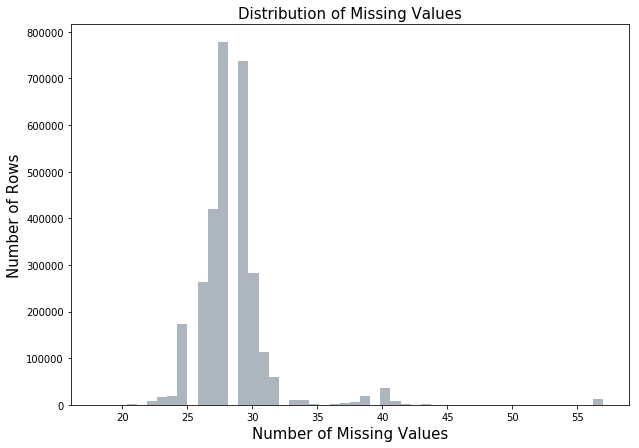

In [3]:
plt.rcParams['figure.figsize'] = [10, 7]

number_missing_per_row = dataset.isnull().sum(axis=1)
sns.distplot(number_missing_per_row, color="#34495e", kde=False);
plt.title('Distribution of Missing Values', fontsize=15)
plt.xlabel('Number of Missing Values', fontsize=15)
plt.ylabel('Number of Rows', fontsize=15);

### All observations have a value for parcelid

In [4]:
dataset['parcelid'].isnull().sum()

0

### 0.1 percent of the data has only parcelid present and all other variables missing
We choose to remove those observations because they don't present any value

In [5]:
print(round(len(number_missing_per_row[number_missing_per_row >= 57]) / len(dataset) * 100, 2),
      'percent of the data has no data features outside of parcelid and will be removed')
dataset = dataset[number_missing_per_row < 57]
print('The dataset now has %d rows' % len(dataset))

0.38 percent of the data has no data features outside of parcelid and will be removed
The dataset now has 2973780 rows


### Table of Missing Values

Of the available variables, here is a table that describes the number of missing values as well as the percent missing.

In [6]:
missing_values = dataset.isnull().sum().reset_index()
missing_values.columns = ['Variable Name', 'Number Missing Values']
missing_values['Percent Missing'] = missing_values['Number Missing Values'] / len(dataset) * 100
missing_values['Percent Missing'] = missing_values['Percent Missing'].replace(np.inf, 0)
missing_values.set_index('Variable Name')

,Number Missing Values,Percent Missing
Variable Name,,
parcelid,0,0.000000
airconditioningtypeid,2162261,72.710860
architecturalstyletypeid,2967719,99.796185
basementsqft,2972152,99.945255
bathroomcnt,25,0.000841
bedroomcnt,13,0.000437
buildingclasstypeid,2961151,99.575322
buildingqualitytypeid,1035292,34.814008
calculatedbathnbr,117475,3.950359


<a id="Description_3"></a>
## Cleaning process

For variables that are nominal, ratio, and interval where appropriate, we wrote a function that replaces outliers 5 standard deviations from the mean and assigning them as 5 standard deviations above or below the mean, respectively.

<a href="#top">⏫ Back to Top</a>

### Variable: airconditioningtypeid - Type of cooling system present in the home (if any)
Has datatype: nominal and 72.710860 percent of values missing 

For this variable, missing values indicate the absence of a cooling system.  We replace all missing values with 0 to represent no cooling system. We changed the column datatype to integer.

In [7]:
print('Before', dataset['airconditioningtypeid'].unique())
dataset['airconditioningtypeid'] = dataset['airconditioningtypeid'].fillna(0).astype(np.int32)
print('After', dataset['airconditioningtypeid'].unique())

Before [ nan   1.  13.   5.  11.   9.  12.   3.]
After [ 0  1 13  5 11  9 12  3]


### Variable: architecturalstyletypeid - Architectural style of the home (i.e. ranch, colonial, split-level, etc…)
Has datatype: nominal and 99.796185 percent of values missing 

Architectural style describes the home design. As such, it is not something we can extrapolate a value for. With over 99% of values missing, we decided to eliminate this variable.

In [8]:
del dataset['architecturalstyletypeid']

### Variable: assessmentyear - year of the property tax assessment

Has datatype: interval and has 2 values missing

We replaced the missing values with the latest tax year which also happens to be the median tax year. We changed the column datatype to integer.

In [9]:
print('Before', dataset['assessmentyear'].unique()[:8].tolist() + ['...'])
median_value = dataset['assessmentyear'].median()
dataset['assessmentyear'] = dataset['assessmentyear'].fillna(median_value).astype(np.int32)
print('After', dataset['assessmentyear'].unique()[:8].tolist() + ['...'])

Before [2015.0, 2014.0, 2003.0, 2012.0, 2001.0, 2011.0, 2013.0, 2016.0, '...']
After [2015, 2014, 2003, 2012, 2001, 2011, 2013, 2016, '...']


### Variable: basementsqft - Finished living area below or partially below ground level
Has datatype: ratio and 99.945255 percent of values missing

Basements are not standard home features. Whenever a basement is not a feature of the home, the value for area was entered as a missing value. With over 99% of values missing, we decided to eliminate this variable.

In [10]:
del dataset['basementsqft'] 

### Variable: bathroomcnt - Number of bathrooms in home including fractional bathrooms
Has datatype: ordinal and 0.000841 percent of values missing

We decided it is potentially possible for the property to not have a bathroom so we decided to replace missing values with zeros since there are only very few. We changed the column datatype to a float.

In [11]:
print('Before', dataset['bathroomcnt'].unique()[:8].tolist() + ['...'])
dataset['bathroomcnt'] = dataset['bathroomcnt'].fillna(0).astype(np.float32)
print('After', dataset['bathroomcnt'].unique()[:8].tolist() + ['...'])

Before [0.0, 2.0, 4.0, 3.0, 1.0, 2.5, 3.5, 5.0, '...']
After [0.0, 2.0, 4.0, 3.0, 1.0, 2.5, 3.5, 5.0, '...']


### Variable: bedroomcnt - Number of bedrooms in home
Has datatype: ordinal and 0.000437 percent of values missing

We decided to replace missing values with zeros since there are only very few to represent a studio apartment. We changed the column datatype to integer.

In [12]:
print('Before', dataset['bedroomcnt'].unique()[:8].tolist() + ['...'])
dataset['bedroomcnt'] = dataset['bedroomcnt'].fillna(0).astype(np.int32)
print('After', dataset['bedroomcnt'].unique()[:8].tolist() + ['...'])

Before [0.0, 4.0, 5.0, 2.0, 3.0, 1.0, 6.0, 7.0, '...']
After [0, 4, 5, 2, 3, 1, 6, 7, '...']


### Variable: buildingclasstypeid - The building framing type (steel frame, wood frame, concrete/brick)
Has datatype: nominal and 99.576949 percent of values missing

With this much missing values and the difficulty of assigning a building framing type, we decided to remove this variable.

In [13]:
del dataset['buildingclasstypeid']

### Variable: buildingqualitytypeid - Overall assessment of condition of the building from best (lowest) to worst (highest)
Has datatype: ordinal and 34.81 percent of values missing

We chose to replace the missing values with the median of the condition assessment instead of giving the missing values the best or worst value. We changed the column datatype to integer.

In [14]:
print('Before', dataset['buildingqualitytypeid'].unique())
medianQuality = dataset['buildingqualitytypeid'].median()
dataset['buildingqualitytypeid'] = dataset['buildingqualitytypeid'].fillna(medianQuality).astype(np.int32)
print('After', dataset['buildingqualitytypeid'].unique())

Before [ nan   7.   4.  10.   1.  12.   8.   3.   6.   9.   5.  11.   2.]
After [ 7  4 10  1 12  8  3  6  9  5 11  2]


### Variable: calculatedbathnbr - Number of bathrooms in home including fractional bathroom
Has datatype: ordinal and 3.95 percent of values missing

With a low number of missing values, we decided to assign 0 to all missing values since we decided above it is possible that a property could have 0 bathrooms. We changed the column datatype to a float.

In [15]:
print('Before', dataset['calculatedbathnbr'].unique()[:8].tolist() + ['...'])
dataset['calculatedbathnbr'] = dataset['calculatedbathnbr'].fillna(0).astype(np.float32)
print('After', dataset['calculatedbathnbr'].unique()[:8].tolist() + ['...'])

Before [nan, 2.0, 4.0, 3.0, 1.0, 2.5, 3.5, 5.0, '...']
After [0.0, 2.0, 4.0, 3.0, 1.0, 2.5, 3.5, 5.0, '...']


### Variable: calculatedfinishedsquarefeet - Calculated total finished living area of the home
Has datatype: ratio and 1.48 percent of values missing

These missing values appear to be consistent with 0 or missing values for variables associated with a building or structure on the property such as bathroomcnt, bedroomcnt, or architecturalstyletypeid. We can assume that no structures exist on these properties and we decided to impute zeros to these. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [nan, 10926.064470192776, 5068.0, 1776.0, 2400.0, 3611.0, 3754.0, 2470.0, '...']
After [0, 10926, 5068, 1776, 2400, 3611, 3754, 2470, '...']


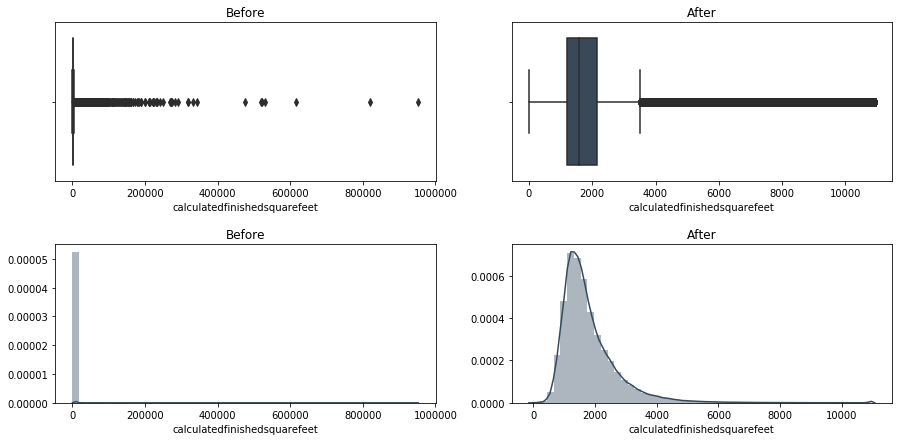

In [16]:
fix_outliers(dataset, 'calculatedfinishedsquarefeet')

print('Before', dataset['calculatedfinishedsquarefeet'].unique()[:8].tolist() + ['...'])
dataset['calculatedfinishedsquarefeet'] = dataset['calculatedfinishedsquarefeet'].fillna(0).astype(np.int32)
print('After', dataset['calculatedfinishedsquarefeet'].unique()[:8].tolist() + ['...'])

### Variable: censustractandblock - census tract and census block ID

Has datatype: nominal and 2.14 percent of values missing

With such a small amount of missing values, we decided to replace them with the median.  A better approach in the future could be taking into account zip code and then median for the missing values.  We changed the column datatype to a float.

In [17]:
print('Before', dataset['censustractandblock'].unique()[:5].tolist() + ['...'])
median_value = dataset['censustractandblock'].median()
dataset['censustractandblock'] = dataset['censustractandblock'].fillna(median_value)
dataset['censustractandblock'] = dataset['censustractandblock'].astype(np.float32)
print('After', dataset['censustractandblock'].unique()[:5].tolist() + ['...'])

Before [nan, 61110010011023.0, 61110009032019.0, 61110010024015.0, 61110010023002.0, '...']
After [60375714234368.0, 61110011035648.0, 61110006841344.0, 61110002647040.0, 61110015229952.0, '...']


### Variable: decktypeid - Type of deck (if any) present on parcel
Has datatype: nominal and 99.427311 percent of values missing

Missing values is most likely an indication of an absence of this feature in the property. With 99% missing values, we will remove this column.

In [18]:
del dataset['decktypeid']

### Variable: finishedfloor1squarefeet - Size of the finished living area on the first (entry) floor of the home
Has datatype: ratio and 93.18 percent of values missing

Having this much missing values and the availability of an alternate variable - calculatedfinishedsquarefeet - with very few missing values, we decided to eliminate this variable.

In [20]:
del dataset['finishedfloor1squarefeet']

### Variable: finishedsquarefeet12 - Finished living area
Has datatype: ratio and 8.89 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Missing values are therefore zeros. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [   nan  4000.  3633. ...,   317.   268.   161.]
After [   0 4000 3633 ...,  317  268  161]


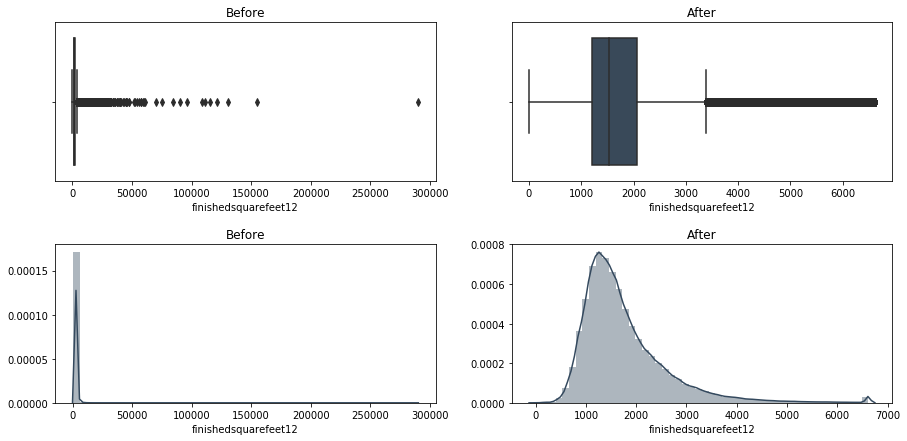

In [21]:
fix_outliers(dataset, 'finishedsquarefeet12')

print('Before', dataset['finishedsquarefeet12'].unique())
dataset['finishedsquarefeet12'] = dataset['finishedsquarefeet12'].fillna(0).astype(np.int32)
print('After', dataset['finishedsquarefeet12'].unique())

### Variable: finishedsquarefeet13 - Finished living area
Has datatype: ratio and 99.743000 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Since there are 99% missing values we will remove this from the dataset.

In [22]:
del dataset['finishedsquarefeet13']

### Variable: finishedsquarefeet15 - Total area
Has datatype: ratio and 93.58 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Since there are 93% missing values we will remove this from the dataset.

In [23]:
del dataset['finishedsquarefeet15']

### Variable: finishedsquarefeet50 - Size of the finished living area on the first (entry) floor of the home
Has datatype: ratio and 93.18 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Since there are 93% missing values we will replace the missing values with 0. We changed the column datatype to float.

In [24]:
dataset['finishedsquarefeet50'] = dataset['finishedsquarefeet50'].fillna(0).astype(np.float32)

### Variable: finishedsquarefeet6 - Base unfinished and finished area
Has datatype: ratio and 99.26 percent of values missing

With 99% missing values, we decided to delete this variable.

In [25]:
del dataset['finishedsquarefeet6']

### Variable: fips - Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details
Has datatype: nominal with values [6037.0, 6059.0, 6111.0] and no missing values

We changed the column datatype to integer.

In [26]:
dataset['fips'] = dataset['fips'].astype(np.int32)

### Variable: fireplacecnt - Number of fireplaces in a home (if any)
Has datatype: ordinal and 89.486882 percent of values missing 

In this dataset, missing value represents 0 fireplaces. We replaced all missing values with zero and change the column datatype to integer. We changed the column datatype to integer.

In [27]:
print('Before', dataset['fireplacecnt'].unique())
dataset['fireplacecnt'] = dataset['fireplacecnt'].fillna(0).astype(np.int32)
print('After', dataset['fireplacecnt'].unique())

Before [ nan   3.   1.   2.   4.   9.   5.   7.   6.   8.]
After [0 3 1 2 4 9 5 7 6 8]


### Variable: fireplaceflag - does the home have a fireplace

Has datatype: ordinal and 99.82 percent of values missing

With 99% missing values, we decided to delete the variable.

In [28]:
del dataset['fireplaceflag']

### Variable: fullbathcnt - Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
Has datatype: ordinal and 3.95 percent of values missing 

We first replaced its missing values with the values of bathroomcnt which is a similar measure. After that, we have 25 observations missing and we replace them with 0. We changed the column datatype to a float.

In [29]:
print('Before', dataset['fullbathcnt'].unique()[:8].tolist() + ['...'])
missing_fullbathcnt = dataset['fullbathcnt'].isnull()
dataset.loc[missing_fullbathcnt, 'fullbathcnt'] = dataset['bathroomcnt'][missing_fullbathcnt].fillna(0)
dataset['fullbathcnt'] = dataset['fullbathcnt'].astype(np.float32)
print('After', dataset['fullbathcnt'].unique()[:8].tolist() + ['...'])

Before [nan, 2.0, 4.0, 3.0, 1.0, 5.0, 7.0, 6.0, '...']
After [0.0, 2.0, 4.0, 3.0, 1.0, 5.0, 7.0, 6.0, '...']


### Variable: garagecarcnt - Total number of garages on the lot including an attached garage

Has datatype: ordinal and 70.298173 percent of values missing 

We assume that missing values will represent no garage and replace all missing values with zero. We changed the column datatype to integer.

In [30]:
dataset['garagecarcnt'] = dataset['garagecarcnt'].fillna(0).astype(np.int32)
print(dataset['garagecarcnt'].unique())

[ 0  2  4  1  3  5  7  6  8  9 12 11 10 13 14 15 25 21 18 17 24 19 16 20]


### Variable: garagetotalsqft - Total number of garages on the lot including an attached garage

Has datatype: ratio and 70.298173 percent of values missing 

We first replaced missing values where garagecarcnt is 0 with 0 garagetotalsqft. We changed the column datatype to a float.
We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


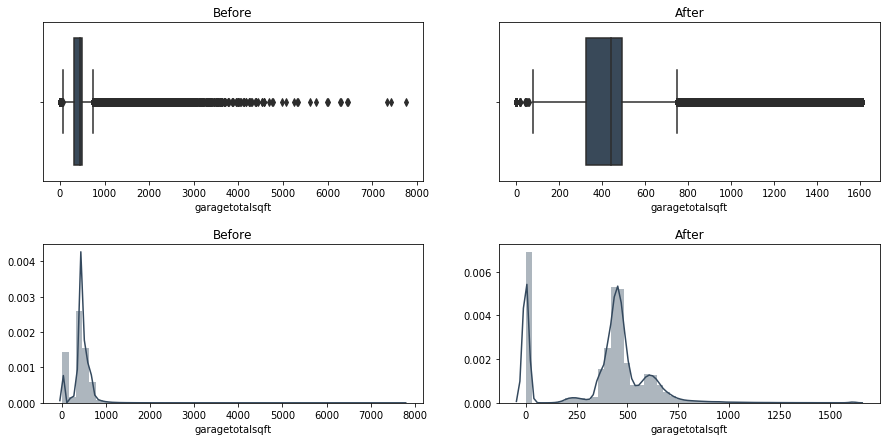

In [31]:
fix_outliers(dataset, 'garagetotalsqft')

dataset.loc[dataset['garagecarcnt'] == 0, 'garagetotalsqft'] = 0
dataset['garagecarcnt'] = dataset['garagecarcnt'].astype(np.float32)
assert dataset['garagetotalsqft'].isnull().sum() == 0

### Variable: hashottuborspa - Does the home have a hot tub or spa

Has datatype: ordinal and 97.679250 percent of values missing 

In this dataset missing values represent doesn't have a hot tub or spa. we replaced all missing values with 0 and all True values with 1. We changed the column datatype to integer.

In [32]:
print('Before', dataset['hashottuborspa'].unique())
dataset['hashottuborspa'] = dataset['hashottuborspa'].fillna(0).replace('True', 1).astype(np.int32)
print('After', dataset['hashottuborspa'].unique())

Before [nan True]
After [0 1]


### Variable: heatingorsystemtypeid - Type of home heating system

Has datatype: nominal and 39.255728 percent of values missing 

We replaced all missing values with 0 which will represent a missing heating system type id. We changed the column datatype to integer.

In [33]:
print('Before', dataset['heatingorsystemtypeid'].unique()[:8].tolist() + ['...'])
dataset['heatingorsystemtypeid'] = dataset['heatingorsystemtypeid'].fillna(0).astype(np.int32)
print('After', dataset['heatingorsystemtypeid'].unique()[:8].tolist() + ['...'])

Before [nan, 2.0, 7.0, 20.0, 6.0, 13.0, 18.0, 24.0, '...']
After [0, 2, 7, 20, 6, 13, 18, 24, '...']


### Variable: landtaxvaluedollarcnt - the assessed value of the land

Has datatype: ratio and 1.89 percent of values missing

We replaced all missing values with the median assessed land values. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


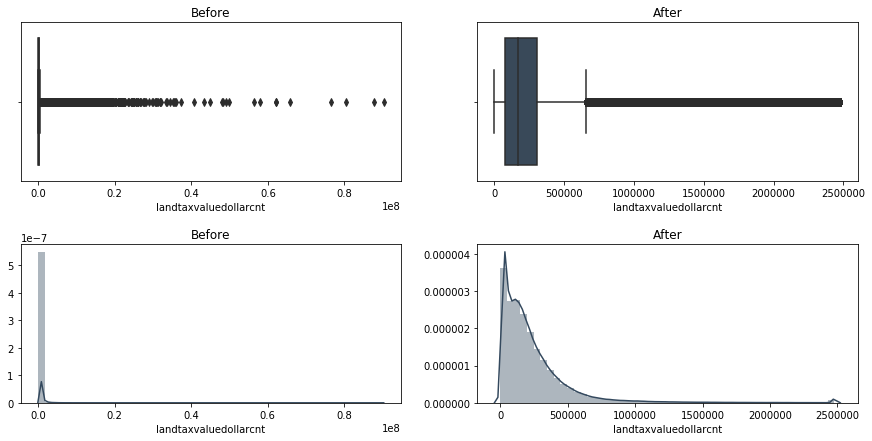

In [34]:
fix_outliers(dataset, 'landtaxvaluedollarcnt')
median_value = dataset['landtaxvaluedollarcnt'].median()
dataset['landtaxvaluedollarcnt'] = dataset['landtaxvaluedollarcnt'].fillna(median_value).astype(np.int32)

### Variables: latitude and longitude

Has datatype: interval and no missing values. We changed the column datatype to float.

In [35]:
dataset[['latitude', 'longitude']] = dataset[['latitude', 'longitude']].astype(np.float32)

### Variable: lotsizesquarefeet - Area of the lot in square feet

Has datatype: ratio and 8.9 percent of values missing 

We replace all missing values with 0 which will represent no lot.
We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


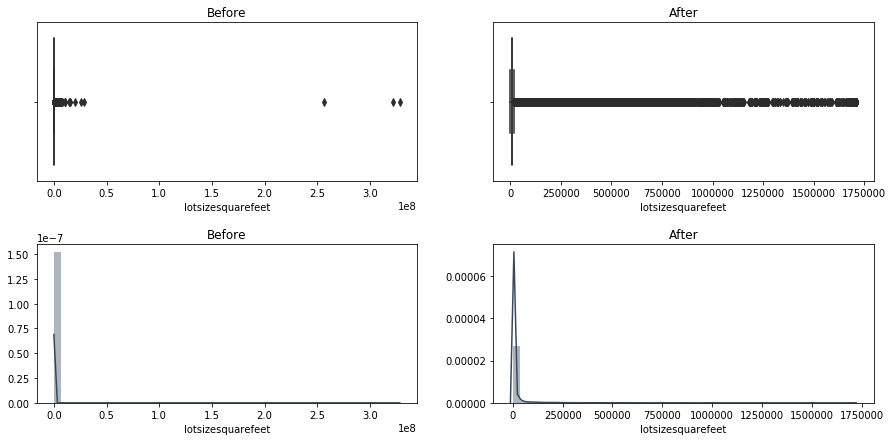

In [36]:
fix_outliers(dataset, 'lotsizesquarefeet')
dataset['lotsizesquarefeet'] = dataset['lotsizesquarefeet'].fillna(0).astype(np.float32)

### Variable: numberofstories - number of stories or levels the home has

Has datatype: ordinal and 77.06 percent of values missing

We replace all missing values with 1 after removing all outliers to represent a single story home. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [nan, 1.0, 4.0, 2.0, 3.0, 4.096842535392357, '...']
After [1, 4, 2, 3, '...']


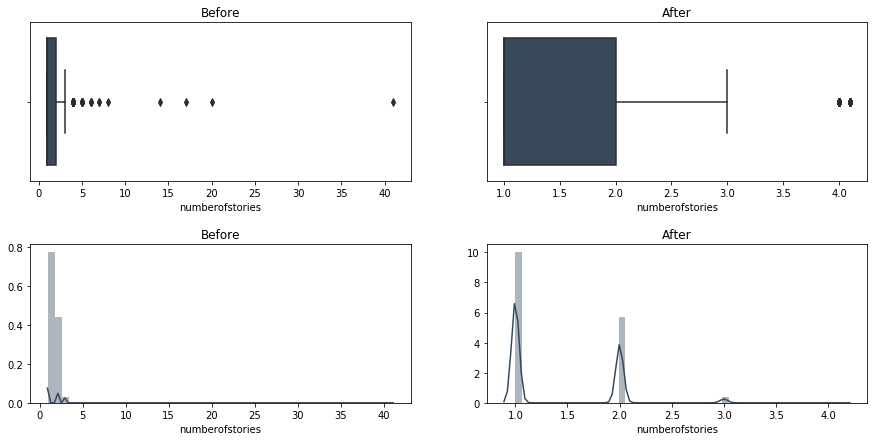

In [37]:
fix_outliers(dataset, 'numberofstories')

print('Before', dataset['numberofstories'].unique()[:8].tolist() + ['...'])
dataset['numberofstories'] = dataset['numberofstories'].fillna(1).astype(np.int32)
print('After', dataset['numberofstories'].unique()[:8].tolist() + ['...'])

### Variable: parcelid - Unique identifier for parcels (lots)
Has datatype: nominal and no values missing. We changed the column datatype to integer.

In [38]:
dataset['parcelid'] = dataset['parcelid'].astype(np.int32)

### Variable: poolcnt - Number of pools on the lot (if any)

Has datatype: ordinal and 82.6 percent of values missing 

We replaced all missing values with 0 which will represent no pools. We changed the column datatype to integer.

In [39]:
print('Before', dataset['poolcnt'].unique())
dataset['poolcnt'] = dataset['poolcnt'].fillna(0).astype(np.int32)
print('After', dataset['poolcnt'].unique())

Before [ nan   1.]
After [0 1]


### Variable: poolsizesum - Total square footage of all pools on property

Has datatype: ratio and 99 percent of values missing 

We replaced all missing values with 0 if number of pools is 0 or with the average poolsizesum otherwise. We changed the column datatype to a float. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


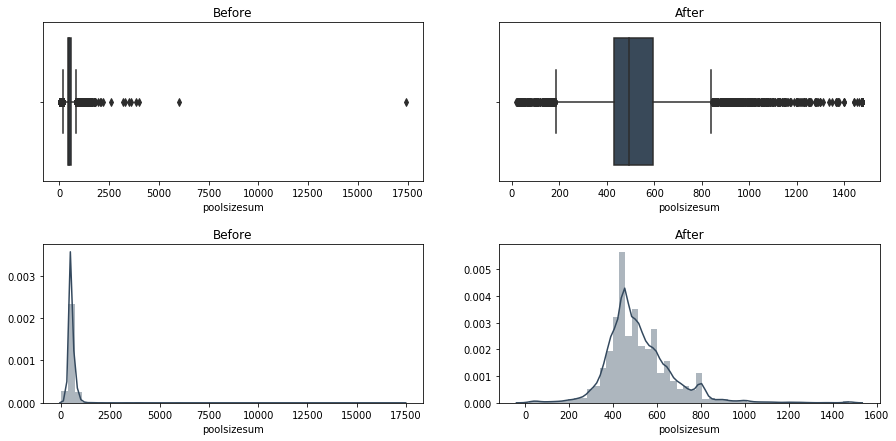

In [40]:
fix_outliers(dataset, 'poolsizesum')
dataset.loc[dataset['poolsizesum'].isnull(), 'poolsizesum'] = int(dataset['poolsizesum'].mean())
dataset.loc[dataset['poolcnt'] == 0, 'poolsizesum'] = 0
dataset['poolcnt'] = dataset['poolcnt'].astype(np.float32)

### Variable: pooltypeid10 - Spa or Hot Tub

Has datatype: nominal and 98.8 percent of values missing 

We replaced all missing values with 0 which will represent no Spa or Hot Tub. We changed the column datatype to integer.

In [41]:
print('Before', dataset['pooltypeid10'].unique())
dataset['pooltypeid10'] = dataset['pooltypeid10'].fillna(0).astype(np.int32)
print('After', dataset['pooltypeid10'].unique())

Before [ nan   1.]
After [0 1]


### Variable: pooltypeid2 - Pool with Spa/Hot Tub

Has datatype: nominal and 98.9 percent of values missing 

We replaced all missing values with 0 which will represent no Pool with Spa/Hot Tub. We changed the column datatype to integer.

In [42]:
print('Before', dataset['pooltypeid2'].unique())
dataset['pooltypeid2'] = dataset['pooltypeid2'].fillna(0).astype(np.int32)
print('After', dataset['pooltypeid2'].unique())

Before [ nan   1.]
After [0 1]


### Variable: pooltypeid7 - Pool without hot tub

Has datatype: nominal and 83.6 percent of values missing 

We replaced all missing values with 0 which will represent no pool without hot tub. We changed the column datatype to integer.

In [43]:
print('Before', dataset['pooltypeid7'].unique())
dataset['pooltypeid7'] = dataset['pooltypeid7'].fillna(0).astype(np.int32)
print('After', dataset['pooltypeid7'].unique())

Before [ nan   1.]
After [0 1]


### Variable: propertycountylandusecode - County land use code i.e. it's zoning at the county level

Has datatype: nominal and 0.02 percent of values missing 

We replaced all missing values with 0 which will represent no county land use code. We changed the column datatype to string.

In [44]:
print('Before', dataset['propertycountylandusecode'].unique()[:8].tolist() + ['...'])
dataset['propertycountylandusecode'] = dataset['propertycountylandusecode'].fillna(0).astype(np.str)
print('After', dataset['propertycountylandusecode'].unique()[:8].tolist() + ['...'])

Before ['010D', '0109', '1200', '1210', '010V', '300V', '0100', '0200', '...']
After ['010D', '0109', '1200', '1210', '010V', '300V', '0100', '0200', '...']


### Variable: propertylandusetypeid - Type of land use the property is zoned for

Has datatype: nominal and 0 percent of values missing.

We are just changing the datatype to integer

In [45]:
dataset['propertylandusetypeid'] = dataset['propertylandusetypeid'].astype(np.int32)

### Variable: propertyzoningdesc - Description of the allowed land uses (zoning) for that property

Has datatype: nominal and 33.4 percent of values missing 

We replaced all missing values with 0 which will represent no description of the allowed land uses.  We changed the column datatype to string.

In [46]:
print('Before', dataset['propertyzoningdesc'].unique())
dataset['propertyzoningdesc'] = dataset['propertyzoningdesc'].fillna(0).astype(np.str)
print('After', dataset['propertyzoningdesc'].unique())

Before [nan 'LCA11*' 'LAC2' ..., 'WCR1400000' 'EMPYYY' 'RMM2*']
After ['0' 'LCA11*' 'LAC2' ..., 'WCR1400000' 'EMPYYY' 'RMM2*']


### Variable: rawcensustractandblock - Census tract and block ID combined - also contains blockgroup assignment by extension

Has datatype: nominal and 0 percent of values missing

We are just changing the datatype to integer

In [47]:
print('Before', dataset['rawcensustractandblock'].unique()[:5].tolist() + ['...'])
dataset['rawcensustractandblock'] = dataset['rawcensustractandblock'].fillna(0).astype(np.int32)
print('After', dataset['rawcensustractandblock'].unique()[:5].tolist() + ['...'])

Before [60378002.041, 60378001.011002004, 60377030.012017004, 60371412.023001, 60371232.052003, '...']
After [60378002, 60378001, 60377030, 60371412, 60371232, '...']


### Variable: regionidcity - City in which the property is located (if any)

Has datatype: nominal and 1.72 percent of values missing

we will replace any missing values with 0 to represent no city ID. We are just changing the datatype to integer

In [48]:
print('Before', dataset['regionidcity'].unique()[:8].tolist() + ['...'])
dataset['regionidcity'] = dataset['regionidcity'].fillna(0).astype(np.int32)
print('After', dataset['regionidcity'].unique()[:8].tolist() + ['...'])

Before [37688.0, 51617.0, 12447.0, 396054.0, 47547.0, nan, 54311.0, 40227.0, '...']
After [37688, 51617, 12447, 396054, 47547, 0, 54311, 40227, '...']


### Variable: regionidcounty - County in which the property is located

Has datatype: nominal and 0 percent of values missing. We changed the column datatype to integer.

In [49]:
print('Before', dataset['regionidcounty'].unique())
dataset['regionidcounty'] = dataset['regionidcounty'].astype(np.int32)
print('After', dataset['regionidcounty'].unique())

Before [ 3101.  1286.  2061.]
After [3101 1286 2061]


### Variable: regionidneighborhood - Neighborhood in which the property is located

Has datatype: nominal and 61.1 percent of values missing 

We replaced all missing values with 0 which will represent no region ID neighborhood. We changed the column datatype to integer.

In [50]:
print('Before', dataset['regionidneighborhood'].unique()[:8].tolist() + ['...'])
dataset['regionidneighborhood'] = dataset['regionidneighborhood'].fillna(0).astype(np.int32)
print('After', dataset['regionidneighborhood'].unique()[:8].tolist() + ['...'])

Before [nan, 27080.0, 46795.0, 274049.0, 31817.0, 37739.0, 115729.0, 7877.0, '...']
After [0, 27080, 46795, 274049, 31817, 37739, 115729, 7877, '...']


### Variable: regionidzip - Zip code in which the property is located

Has datatype: nominal and 0.08 percent of values missing 

We replaced all missing values with 0 which will represent no zip code. We changed the column datatype to integer.

In [51]:
print('Before', dataset['regionidzip'].unique()[:8].tolist() + ['...'])
dataset['regionidzip'] = dataset['regionidzip'].fillna(0).astype(np.int32)
print('After', dataset['regionidzip'].unique()[:8].tolist() + ['...'])

Before [96337.0, 96095.0, 96424.0, 96450.0, 96446.0, 96049.0, 96434.0, 96436.0, '...']
After [96337, 96095, 96424, 96450, 96446, 96049, 96434, 96436, '...']


### Variable: roomcnt - Total number of rooms in the principal residence

Has datatype: nominal and 0.001 percent of values missing 

We replaced all missing values with 1 which will represent no Total number of rooms in the principal residence reported. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [  0.           8.           4.           5.           7.           6.          11.
   3.          10.           9.           2.          12.          15.67703238
  13.          15.          14.           1.                  nan]
After [ 0  8  4  5  7  6 11  3 10  9  2 12 15 13 14  1]


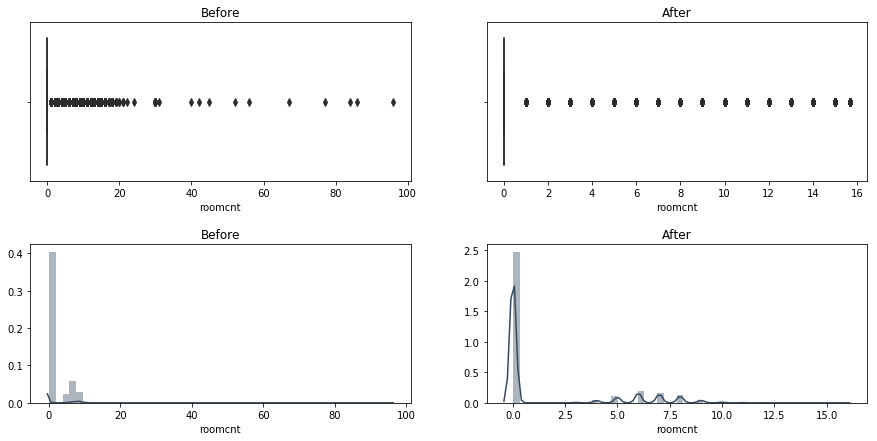

In [52]:
fix_outliers(dataset, 'roomcnt')

print('Before', dataset['roomcnt'].unique())
dataset['roomcnt'] = dataset['roomcnt'].fillna(1).astype(np.int32)
print('After', dataset['roomcnt'].unique())

### Variable: storytypeid - Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.). See tab for details.

Has datatype: nominal and 99.9 percent of values missing 

With 99% missing values, we decided to remove this variable.

# TODO investigate why this is missing

In [55]:
del dataset['storytypeid']

### Variable: structuretaxvaluedollarcnt - the assessed value of the building

Has datatype: ratio and 1.46 percent of values missing

We replaced all missing values with the median assessed building tax. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


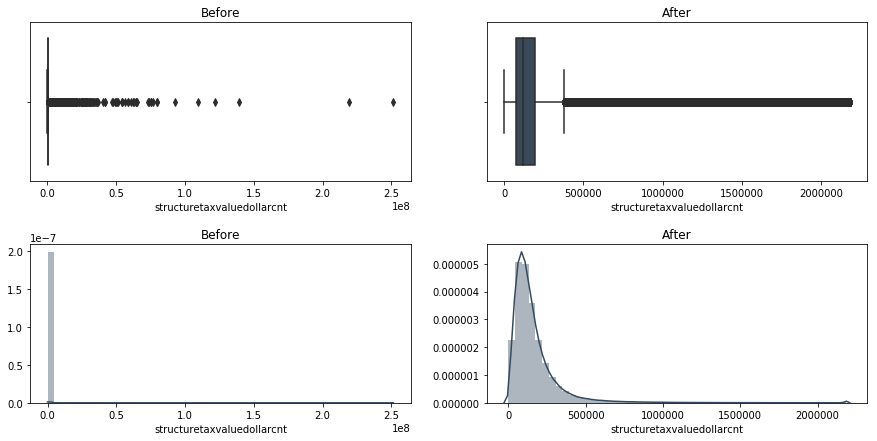

In [56]:
fix_outliers(dataset, 'structuretaxvaluedollarcnt')

medTax = np.nanmedian(dataset['structuretaxvaluedollarcnt'])

dataset['structuretaxvaluedollarcnt'] = dataset['structuretaxvaluedollarcnt'].fillna(medTax).astype(np.int32)

### Variable: taxamount - property tax for the assessment year

Has datatype: ratio and 0.66 percent of values missing

We replaced all missing values with the median property taxes for the assessment year. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


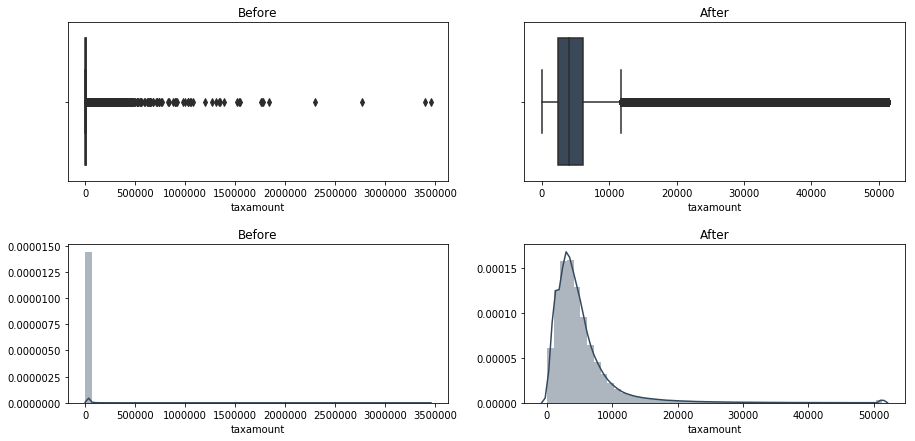

In [57]:
fix_outliers(dataset, 'taxamount')
median_value = dataset['taxamount'].median()
dataset['taxamount'] = dataset['taxamount'].fillna(median_value).astype(np.float32)

### Variable: taxdelinquencyflag - property taxes from 2015 that are past due

Has datatype: nominal and 98.10 percent of values missing

We replaced all missing values with 0 representing no past due property taxes and all Y values with 1 representing that there are past due property taxes. We changed the column datatype to integer.

In [58]:
print('Before', dataset['taxdelinquencyflag'].unique())
dataset['taxdelinquencyflag'] = dataset['taxdelinquencyflag'].fillna(0).replace('Y', 1).astype(np.int32)
print('After', dataset['taxdelinquencyflag'].unique())

Before [nan 'Y']
After [0 1]


### Variable: taxdelinquencyyear - years of delinquency

Has datatype: interval and 98.10 percent of values missing

We replaced all missing values with 0 representing no years of property tax delinquencies. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


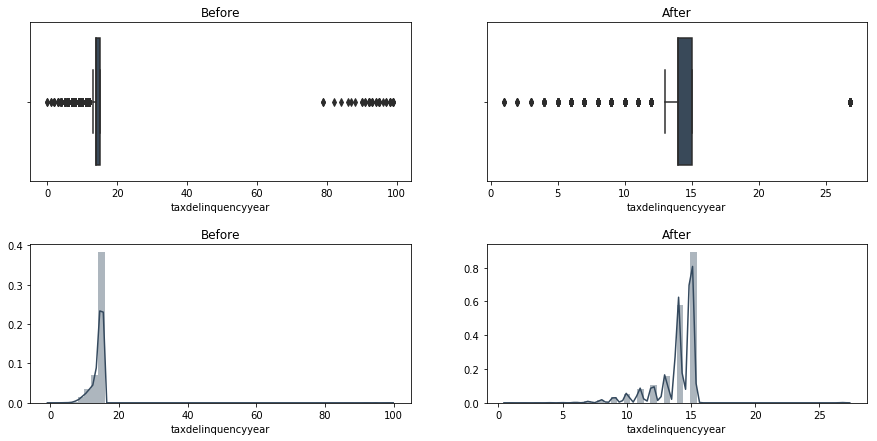

In [59]:
fix_outliers(dataset, 'taxdelinquencyyear')
dataset['taxdelinquencyyear'] = dataset['taxdelinquencyyear'].fillna(0).astype(np.int32)

### Variable: taxvaluedollarcnt - total tax 

Has datatype: ratio and 1.04 percent of values missing

We replaced all missing values with the median total tax amount. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


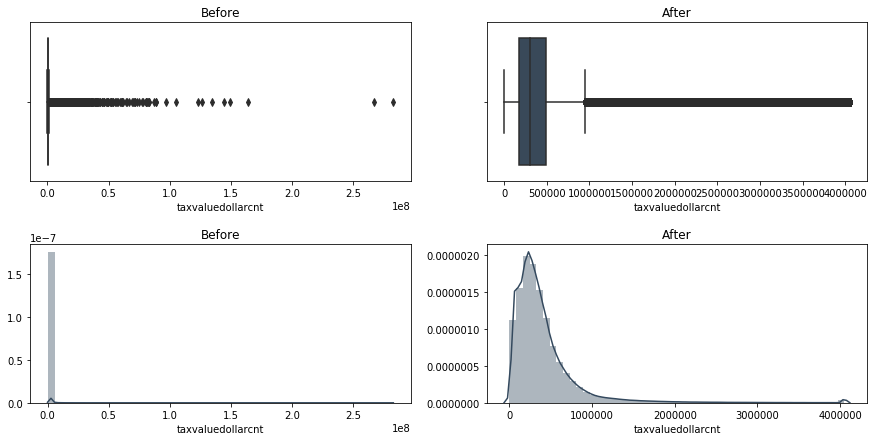

In [60]:
fix_outliers(dataset, 'taxvaluedollarcnt')
median_value = dataset['taxvaluedollarcnt'].median()
dataset['taxvaluedollarcnt'] = dataset['taxvaluedollarcnt'].fillna(median_value).astype(np.int32)

### Variable: threequarterbathnbr - Number of 3/4 bathrooms in house (shower + sink + toilet)

Has datatype: ordinal and 89.5 percent of values missing 

We replaced all missing values with 0 which will represent no Number of 3/4 bathrooms in the property. We changed the column datatype to integer.

In [61]:
print('Before', dataset['threequarterbathnbr'].unique())
dataset['threequarterbathnbr'] = dataset['threequarterbathnbr'].fillna(0).astype(np.int32)
print('After', dataset['threequarterbathnbr'].unique())

Before [ nan   1.   2.   4.   3.   6.   5.   7.]
After [0 1 2 4 3 6 5 7]


### Variable: typeconstructiontypeid - What type of construction material was used to construct the home

Has datatype: nominal and 99.7 percent of values missing 

With 99% missing values, we decided to remove this variable.

In [62]:
del dataset['typeconstructiontypeid']

### Variable: unitcnt - number of units in the building

Has datatype: ordinal and 33.5 percent of values missing

We replaced all missing values with 1 to represent a single family home for any with no values.  We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [nan, 2.0, 1.0, 3.0, 5.0, 4.0, 9.0, 13.420650857467523, '...']
After [ 1  2  3  5  4  9 13 12  6  7  8 10 11]


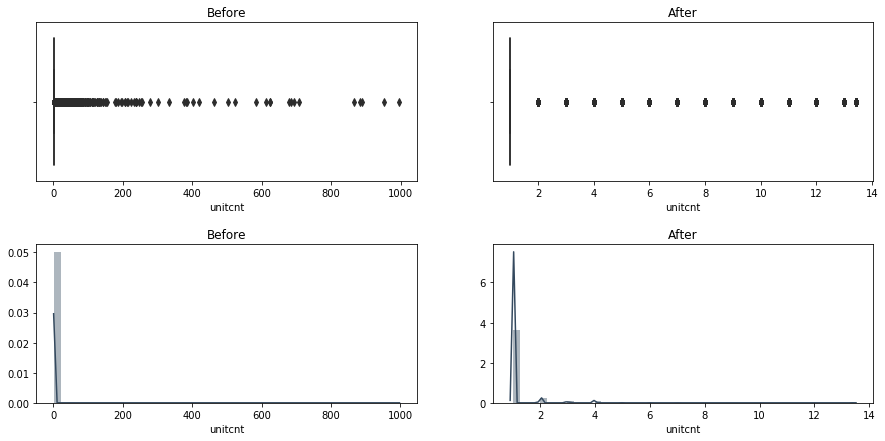

In [63]:
fix_outliers(dataset, 'unitcnt')

print('Before', dataset['unitcnt'].unique()[:8].tolist() + ['...'])
dataset['unitcnt'] = dataset['unitcnt'].fillna(1).astype(np.int32)
print('After', dataset['unitcnt'].unique())

### Variable: yardbuildingsqft17 - sq feet of patio in yard

Has datatype: interval and 97.29 percent of values missing

We replaced all missing values with 0 representing no patio. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


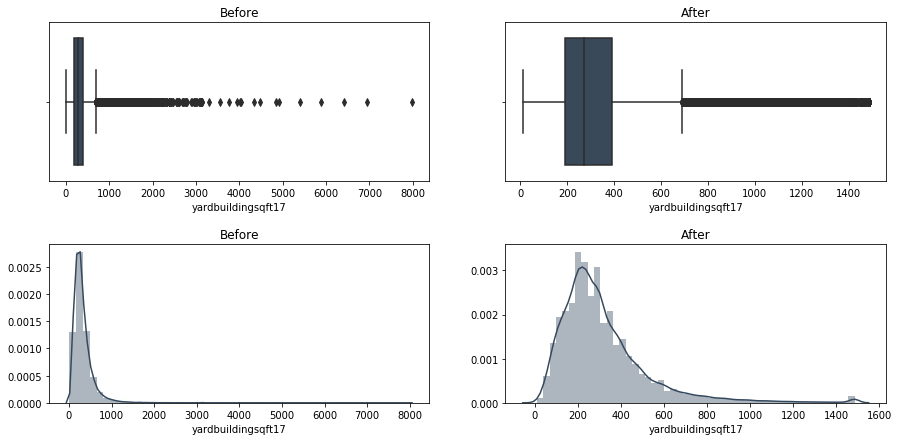

In [64]:
fix_outliers(dataset, 'yardbuildingsqft17')
dataset['yardbuildingsqft17'] = dataset['yardbuildingsqft17'].fillna(0).astype(np.int32)

### Variable: yardbuildingsqft26 - storage shed/building in yard

Has datatype: interval and 99.91 percent of values missing 

We replaced all missing values with 0 which will represent no (square ft) storage shed or building in the yard. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


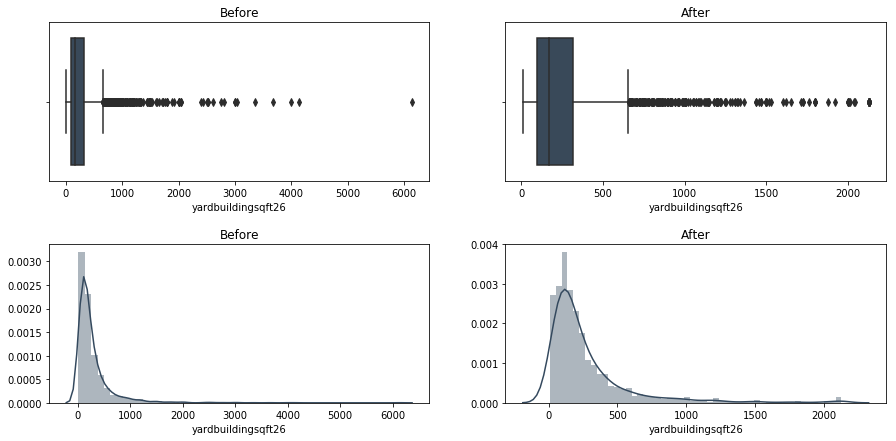

In [65]:
fix_outliers(dataset, 'yardbuildingsqft26')
dataset['yardbuildingsqft26'] = dataset['yardbuildingsqft26'].fillna(0).astype(np.float32)

### Variable: yearbuilt - The Year the residence was built

Has datatype: interval and 1.63 percent of values missing 

We replaced all missing values with the median year built of 1963 until we have a better method to impute. We changed the column datatype to integer.

In [66]:
print('Before', dataset['yearbuilt'].unique()[:8].tolist() + ['...'])
medYear = dataset['yearbuilt'].median()
dataset['yearbuilt'] = dataset['yearbuilt'].fillna(medYear).astype(np.int32)
print('After', dataset['yearbuilt'].unique()[:8].tolist() + ['...'])

Before [nan, 1948.0, 1947.0, 1943.0, 1946.0, 1978.0, 1958.0, 1949.0, '...']
After [1963, 1948, 1947, 1943, 1946, 1978, 1958, 1949, '...']


<a id="Description_4"></a>
## Final verification of data quality

We went through every variable and next cell will confirm that the dataset has no missing values.

<a href="#top">⏫ Back to Top</a>

In [67]:
assert np.all(~dataset.isnull())

<a id="Description_5"></a>
## Meaning and type of data for each attribute in the data file after data cleaning

<a href="#top">⏫ Back to Top</a>

In [71]:
output_variables_table(variables, dataset)

Variable,Type,Scale,Meaning
airconditioningtypeid,nominal,"[0, 1, 13, 5, 11, 9, 12, 3]",Type of cooling system present in the home (if any)
assessmentyear,interval,"(2000, 2016)",The year of the property tax assessment
bathroomcnt,ordinal,"[0.0, 2.0, 4.0, 3.0, 1.0, ... (37 More)]",Number of bathrooms in home including fractional bathrooms
bedroomcnt,ordinal,"[0, 4, 5, 2, 3, ... (21 More)]",Number of bedrooms in home
buildingqualitytypeid,ordinal,"[7, 4, 10, 1, 12, ... (12 More)]",Overall assessment of condition of the building from best (lowest) to worst (highest)
calculatedbathnbr,ordinal,"[0.0, 2.0, 4.0, 3.0, 1.0, ... (35 More)]",Number of bathrooms in home including fractional bathroom
calculatedfinishedsquarefeet,ratio,"(0, 10926)",Calculated total finished living area of the home
censustractandblock,nominal,"[60375714234368.0, 61110011035648.0, 61110006841344.0, 61110002647040.0, 61110015229952.0, ... (457 More)]",Census tract and block ID combined - also contains blockgroup assignment by extension
finishedsquarefeet12,ratio,"(0, 6615)",Finished living area
finishedsquarefeet50,ratio,"(0, 31303)",Size of the finished living area on the first (entry) floor of the home


<a id="Description_6"></a>
## Table of Binary Variables (0 or 1)
We standardized all Yes/No and True/False variables to 1 or 0, respectively. The table below shows that all binary flags in this dataset represent rare features such a pool, hot tub, tax delinquency flag, and three quarter bathroom.

<a href="#top">⏫ Back to Top</a>

In [72]:
bin_vars = ['hashottuborspa', 'poolcnt', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'taxdelinquencyflag', 'threequarterbathnbr']
pd.DataFrame(dataset[bin_vars].mean() * 100, columns=['Percent with value equal to 1'])

,Percent with value equal to 1
hashottuborspa,2.320750
poolcnt,17.403238
pooltypeid2,1.078594
pooltypeid7,16.324644
pooltypeid10,1.242156
taxdelinquencyflag,1.898661
threequarterbathnbr,10.584172


<a id="save_state"></a>
## Save dataset state

We save the cleaned dataset in order to faster load.

<a href="#top">⏫ Back to Top</a>

In [69]:
dataset.to_csv('../../datasets/clean_dataset.csv', index=False)

<a id="restore_state"></a>
# Restore Cleaned Dataset [CHECKPOINT]

Next cell will restore the cleanded dataset. You could run this cell instead of runing all above cleaning cells.

<a href="#top">⏫ Back to Top</a>

In [2]:
dataset = pd.read_csv('../../datasets/clean_dataset.csv')
variables = variables.loc[dataset.columns]

<a id="Attribute"></a>
# Attribute Visualizion
<b>10 points</b>

<i>
<b>Description:</b><br/>
Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.
</i>

<a href="#top">⏫ Back to Top</a>

# TODO decide which visualization to keep and remove all others
# TODO make the visualizations run
# TODO add subcategories with links to the Contents menu on top for every visualization you do

## Summary Statistics of All Continuous Variables

To make the table more readable, we converted all simple statistics of continuous variables to integers. We lose some precision but we get a better overview. For each variable, we have already accounted for outliers and standardized missing values. We can immediately see that 0 is the most common value for many of the variables. To explore further, we chose to visualize each variable that had non-zero 25% to 75% values in the form of a boxplot and histogram.

In [72]:
train_data = data[~data['logerror'].isnull()]

continous_vars = variables[variables['type'].isin(['ratio', 'interval'])].index
continous_vars = continous_vars[continous_vars.isin(data.columns)]
continous_vars = continous_vars[~continous_vars.isin(['longitude', 'latitude'])]

output_table = data[continous_vars].describe().T
mode_range = data[continous_vars].mode().T
mode_range.columns = ['mode']
mode_range['range'] = data[continous_vars].max() - data[continous_vars].min()
output_table = output_table.join(mode_range)
output_table.astype(int)

,count,mean,std,min,25%,50%,75%,max,mode,range
calculatedfinishedsquarefeet,2973905,1784,984,0,1199,1561,2124,10925,0,10925
finishedsquarefeet12,2973905,1596,958,0,1092,1466,1996,6615,0,6615
finishedsquarefeet50,2973905,94,390,0,0,0,0,31303,0,31303
garagetotalsqft,2973905,113,217,0,0,0,0,1610,0,1610
lotsizesquarefeet,2973905,19810,73796,0,5200,6700,9243,1710750,0,1710750
poolsizesum,2973905,90,196,0,0,0,0,1476,0,1476
yardbuildingsqft17,2973905,8,61,0,0,0,0,1485,0,1485
yardbuildingsqft26,2973905,0,12,0,0,0,0,2126,0,2126
yearbuilt,2973905,1964,23,1801,1950,1963,1981,2015,1963,214
structuretaxvaluedollarcnt,2973905,166367,179850,1,75440,122590,195143,2181198,122590,2181197


## Calculated Finished Square Feet
For calculated square feet, most values were 0 with a range from 0 to 10898 sqft.  Note that we removed outliers earlier while cleaning the data.  The median of 1561 was a little smaller than the mean of 1784 so we expect to see a slight right skew, which we do below.  What is interesting here is the peak at 0 of values and then another peak around 1600 to 1800.  We continue to have few properties with very large (higher than the 75th percentile of 2124) which is fairly normal for any area to have the middle class homes with few larger homes mixed in.

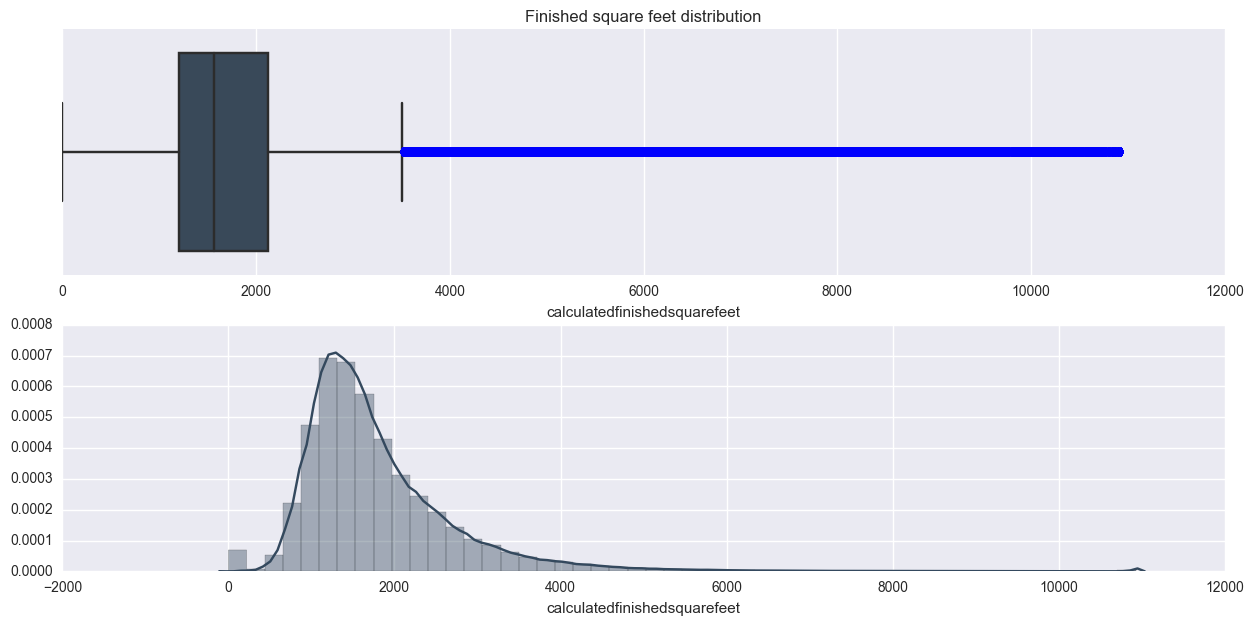

In [73]:
f, (ax0,ax2) = plt.subplots(nrows=2, ncols=1, figsize=[15, 7])
sns.boxplot(data['calculatedfinishedsquarefeet'], ax=ax0, color="#34495e").set_title('Finished square feet distribution');
sns.distplot(data['calculatedfinishedsquarefeet'], ax=ax2, color="#34495e");

## Finished Living Area
Similar to calculated finished square feet, finished living area had outliers which we already fixed above.  The range for finished living area is 0 to 6871 with 0 being the mode of the data.  The mean (1596) is about 100sqft larger than the median (1466) so they are relatively the same since the variance is 962.

This variable is bimodal in with a large spike at 0 and another peak with a fairly normal distribution and long right tail at around 1400.

We also see a slight spike at the very end of the tail of the dataset.  This means there were a lot of outliers that were set to the maximum (mean + 6 * std).

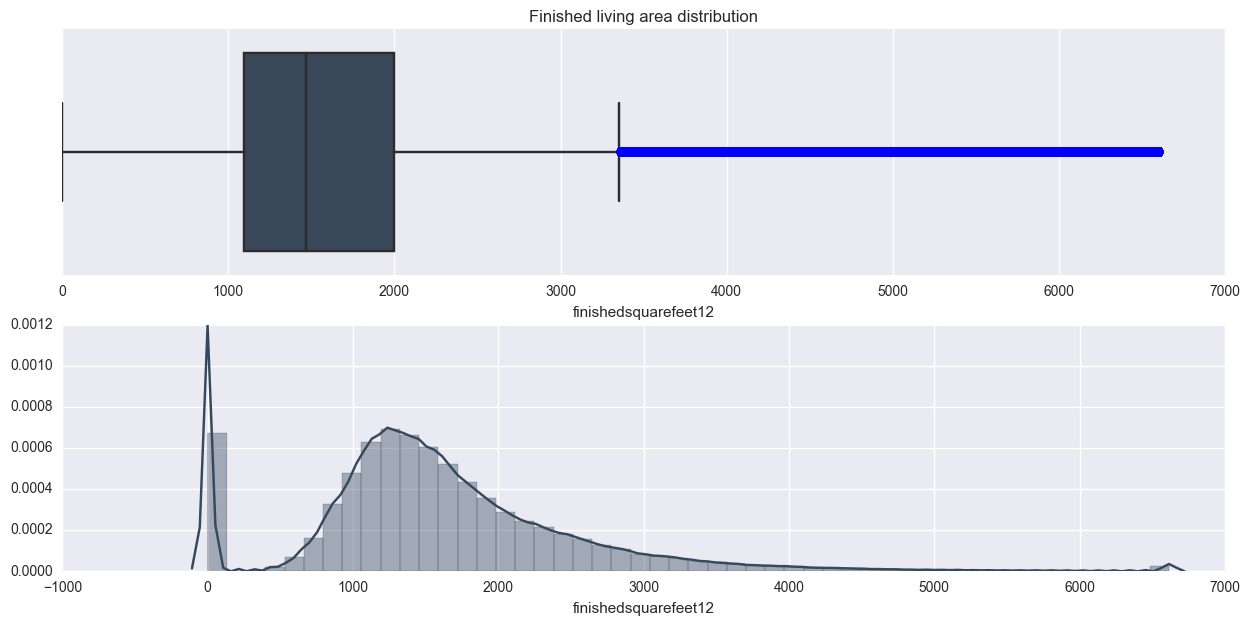

In [74]:
f, (ax0,ax2) = plt.subplots(nrows=2, ncols=1, figsize=[15, 7])
sns.boxplot(data['finishedsquarefeet12'], ax=ax0, color="#34495e").set_title('Finished living area distribution');
sns.distplot(data['finishedsquarefeet12'], ax=ax2, color="#34495e");

## Lot Size Square Feet
Lot size square feet has the largest range from 0 to 1,710,750 even after removing all outliers (mean + std * 5).  The mode for this variable is 0 so we see below a spike at 0 and a very long right tail.

What is interesting with this variable is the large variance of 73796. The 25th to 75th percentile values are 5200 and 9243 respectively so we will skipped over the box plot and plotted the histogram below.

In the histogram, we see a right skewed distribution which makes sense considering the mean is 19810 and the median is 6700 - again, with such a large variance it is difficult for the eye to see the difference.  The main takeaway here is the large number of 0s.  

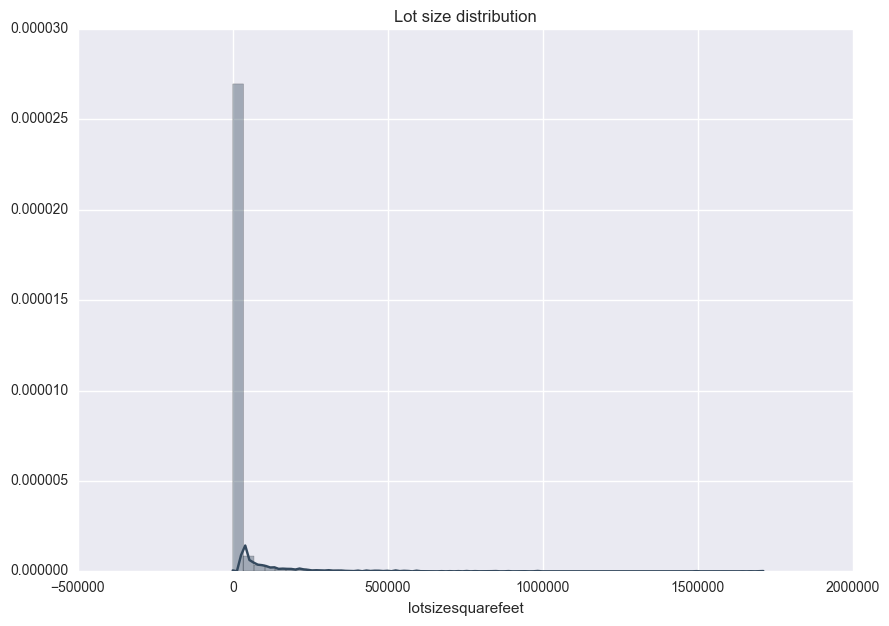

In [75]:
f, (ax0) = plt.subplots(nrows=1, ncols=1)
sns.distplot(data['lotsizesquarefeet'], ax=ax0, color="#34495e").set_title('Lot size distribution');

## Year Built
The year the properties were built ranges from 1801 to 2015.  The mode and median of 1963 is only a year difference from the mean of 1964.  The distribution seems to be fairly normal with the peak in the early 1960s and dropping off on both sides.  We see a number of homes that were built before 1905 (the low whisker of the boxplot) which gives us a long left tail.  

We see a few other spikes in homes built which could correlate to a number of other factors such as healthy economic growth, political backing on mortgages, or rises in population.  The baby boomers born early 1960 shows many houses being built and around the time they turned 18 more houses seem to have been built.   We see an apparent fall right before 2000 which could be the dot com burst and another drop in the housing burst of 2007. Because our data was collected in 2016, we expect to see fewer homes built the previous year.

What will be interesting with this variable is how old a home has to be to begin to "fall apart" or need major renovations to the piping or foundation.  Will a home built in a certain year have many homes made from a faulty material that causes damages later on?  Will the Zestimate take into account the disclosures of a home that each sale price typically does?

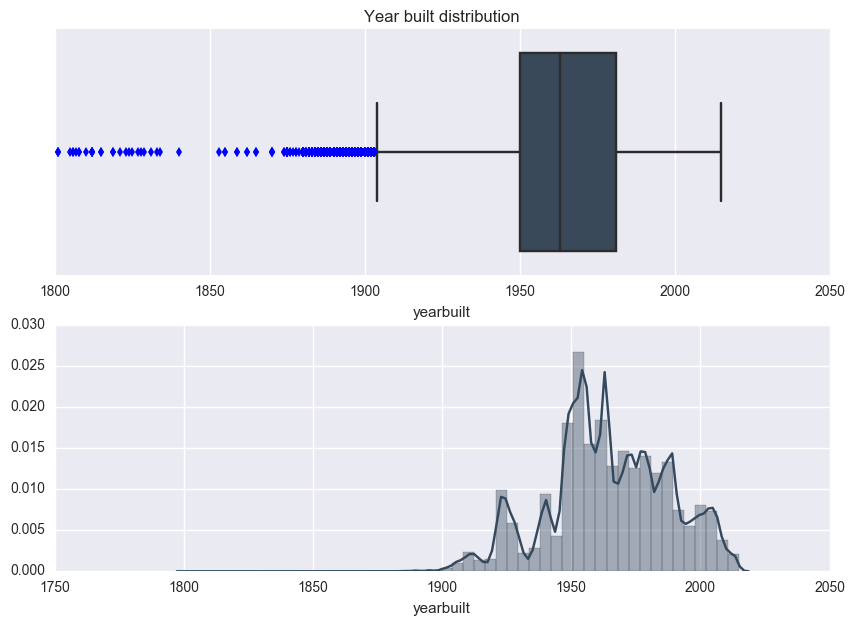

In [76]:
f, (ax0,ax2) = plt.subplots(nrows=2, ncols=1)
sns.boxplot(data['yearbuilt'].dropna(), ax=ax0, color="#34495e").set_title('Year built distribution');
sns.distplot(data['yearbuilt'].dropna(), ax=ax2, color="#34495e");

## Total Tax Value
The total tax value of the property ranges from 1 to 4,052,186.  The median of 306,086 is the same as the mode and a little smaller than the mean of 407,695 which is evident in the right skewed distribution below.  These values have already been adjusted for outliers which is why we see a slight spike at the maximum value for larger developments and unique mansions.

The distribution is fairly similar to square feet above because the tax is calculated by value assessed * square feet. What is interesting to note here is the missing values for tax were replaced by the median (hence the median and mode being the same) where the square footage missing values were replaced with 0s (hence the 0 as the mode and second peak in the distribution).

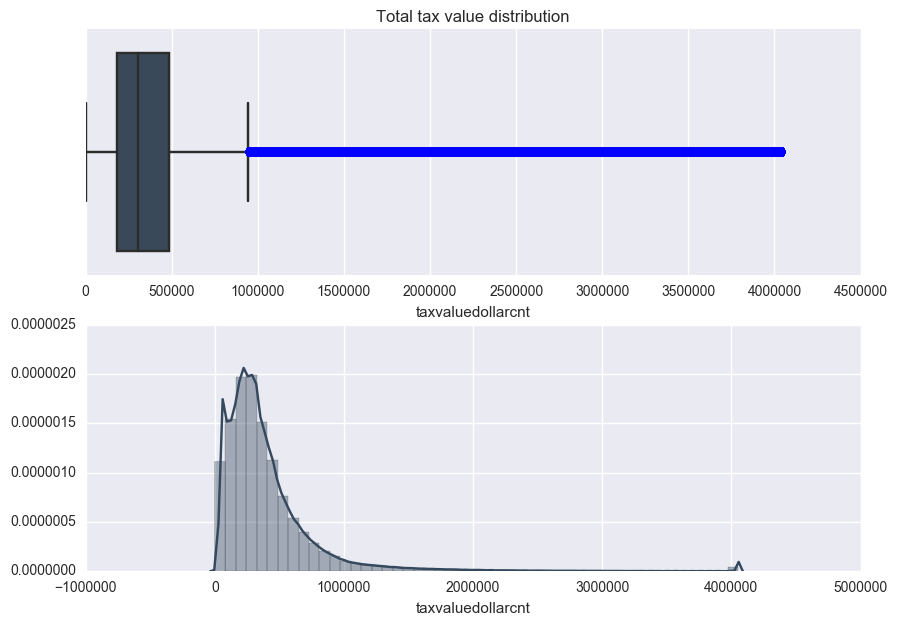

In [77]:
f, (ax0,ax2) = plt.subplots(nrows=2, ncols=1)
sns.boxplot(data['taxvaluedollarcnt'], ax=ax0, color="#34495e").set_title('Total tax value distribution');
sns.distplot(data['taxvaluedollarcnt'], ax=ax2, color="#34495e");

## Building and Land Tax
The building or structure tax has a similar right skewed distribution as total tax.  The values range from 1 to 2,165,929, already adjusted for outliers and cleaned up with missing values set to median.  That being said, the median and mode are the same at 122,590 which is lower than the mean of 166,344.

The land tax values range from 1 to 2,477,536, also adjusted for outliers and cleaned up with missing values set to median.  Because of this, the median and mode are the same at 167,043 which is lower than the mean of 242,391.

Land tax seems to have a larger range of values from the 25th to 75th percentile than the building tax.  This means that the land is valued at a greater variance (287k) than the buildings in certain areas (variance of 179k). We think this could be due to location itself as better neighborhoods, safer areas, or better schools could result in a higher assessment than other locations, thus widening the variance.  

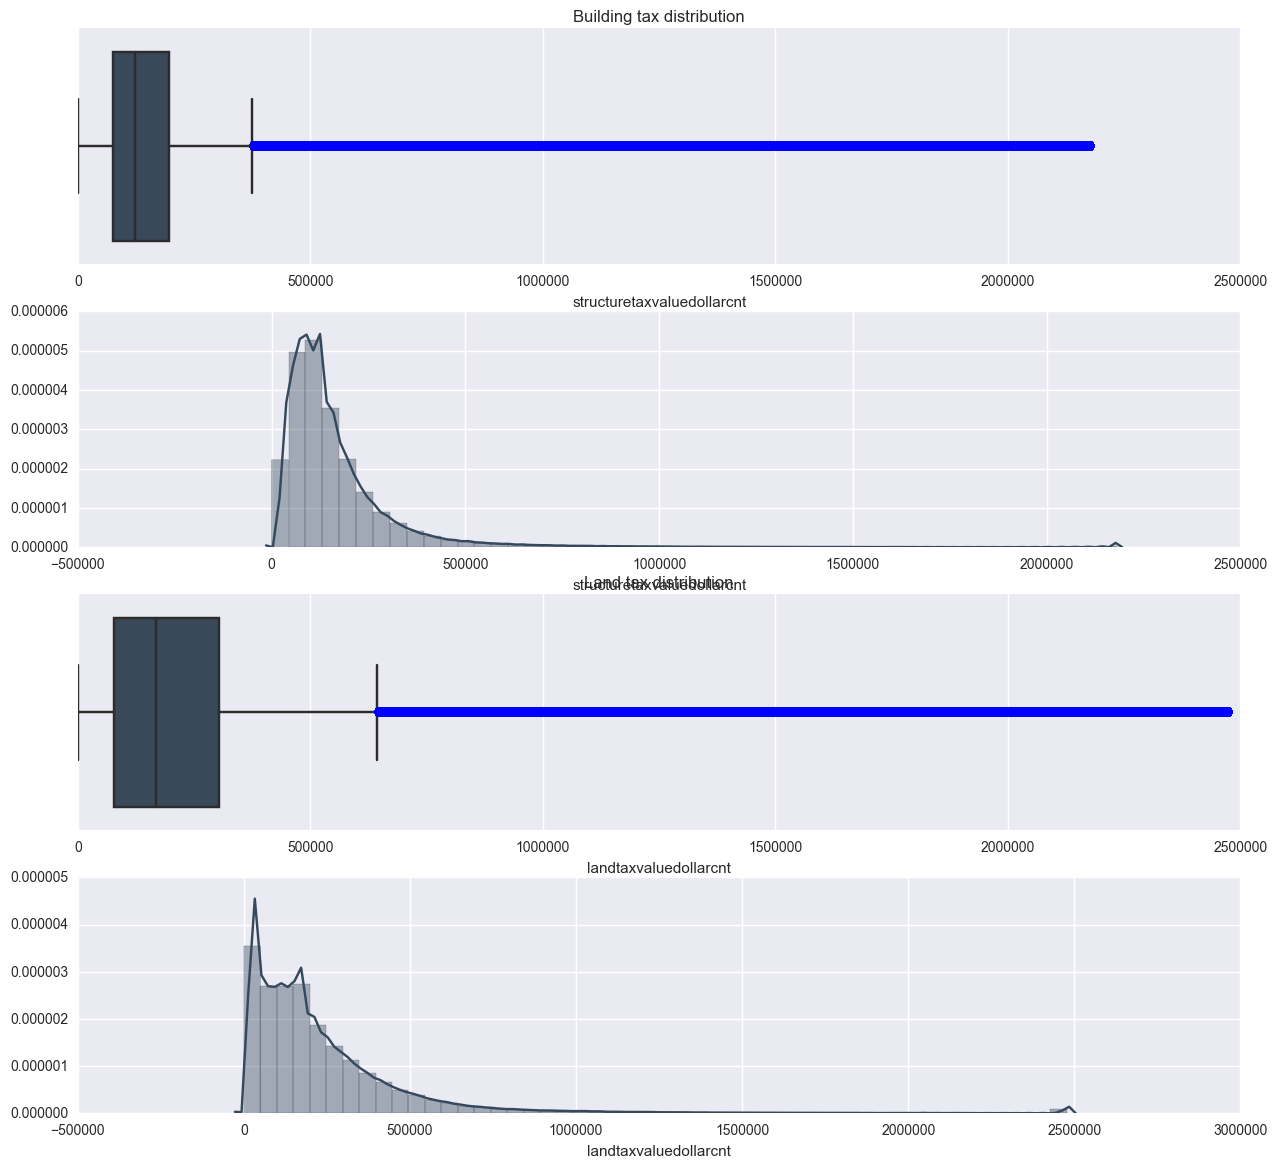

In [78]:
f, (ax0,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=[15, 14])
sns.boxplot(data['structuretaxvaluedollarcnt'], ax=ax0, color="#34495e").set_title('Building tax distribution');
sns.distplot(data['structuretaxvaluedollarcnt'], ax=ax2, color="#34495e");
sns.boxplot(data['landtaxvaluedollarcnt'], ax=ax3, color="#34495e").set_title('Land tax distribution');
sns.distplot(data['landtaxvaluedollarcnt'], ax=ax4, color="#34495e");

## Assessment Year
Assessment year is the year that the property was assessed.  The 25th through 75th percentile of values are all from the year 2015 so reading a box plot is not very helpful.  Instead we list out the unique values for assessment year along with our histogram.

In the state of California, the base year value is set when you originally purchase the property, based on the sales price listed on the deed.  However, there are exceptions which is why we see a few assessment years from 2000 to 2016 thrown in.

In order for assessment year to be useful for our predictions, we should find out what each exception is and what the cause of it not to be assessed at the point of sale.  This could affect the predicted log error.

('Unique years:', array([2015, 2014, 2003, 2012, 2001, 2011, 2013, 2016, 2010, 2004, 2005,
       2002, 2000, 2009]))


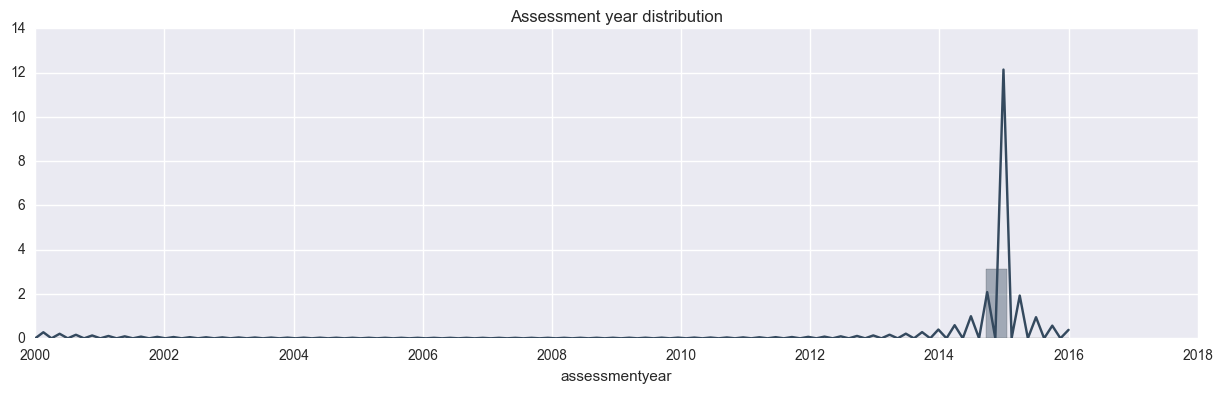

In [79]:
print('Unique years:', data['assessmentyear'].unique())
f, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=[15, 4])
sns.distplot(data['assessmentyear'], ax=ax2, color="#34495e")
plt.title('Assessment year distribution');

## Distribution of Target Variable: Logerror

In the training dataset, logerror is the response variable so we are interested in seeing the distribution of log error that we are training on. We visualize this using a boxplot and histogram to get a general picture of the overall distribution. It is symmetric around zero which implies that the model generating the logerror has no bias and is very accurate in most instances.

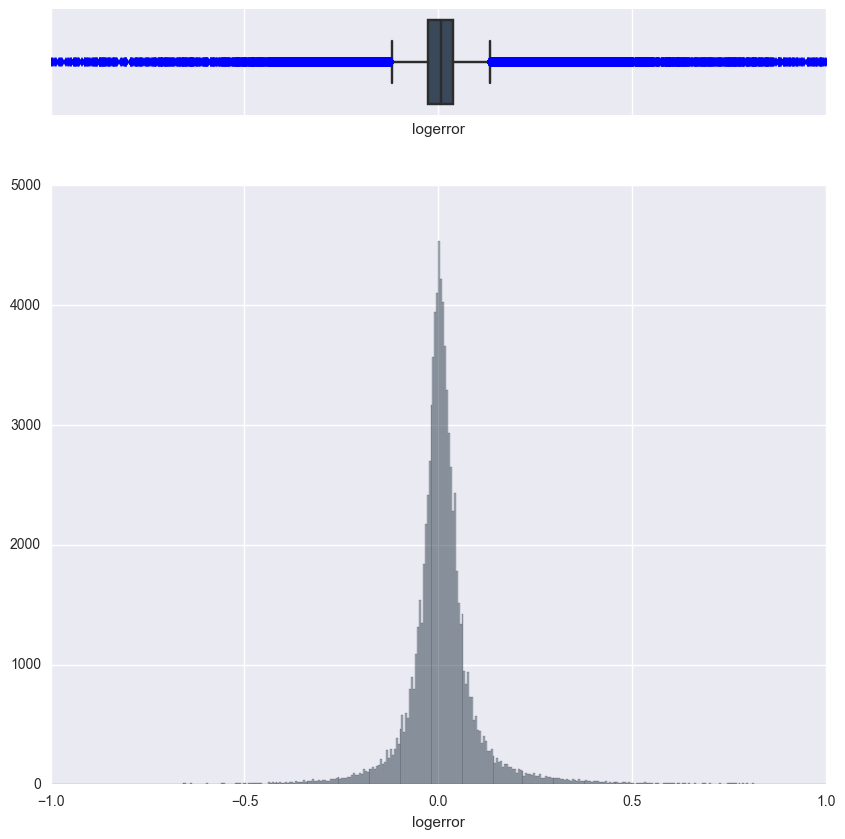

In [80]:
train_data = data[~data['logerror'].isnull()]

x = train_data['logerror']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
    gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 10))
sns.boxplot(train_data['logerror'][train_data['logerror'].abs()<1], ax=ax_box, color="#34495e")
sns.distplot(
    train_data['logerror'][train_data['logerror'].abs()<1],
    ax=ax_hist, bins=400, kde=False, color="#34495e");

## Count of Bathrooms
We think that the number of bathrooms in a home could be interesting because our data was collected in California where rent is very high.  It is common to buy a rental property and have random tenants.  Tenants that do not know each other may want their own bathroom.  In our case, most homes have 2 bathrooms. Notably, there are outliers with no bathrooms or suspiciously high counts. We see records in the dataset with no bathroom which we justified above as being possible.  Because we are looking at frequency, we chose to visualize the sum of each number of bathrooms (as a category) in a bar chart.

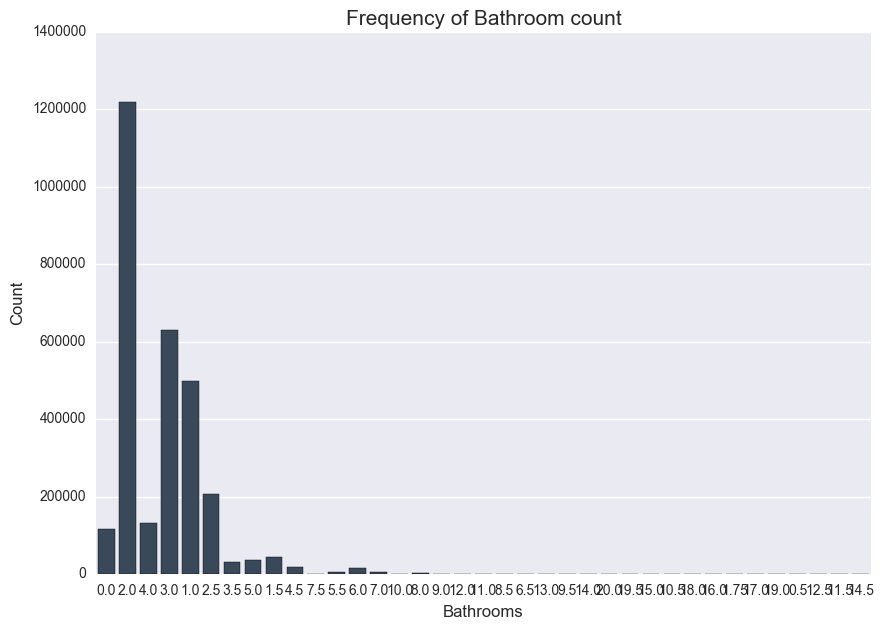

In [81]:
sns.countplot(data['bathroomcnt'], color="#34495e")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathrooms', fontsize=12)
plt.title("Frequency of Bathroom count", fontsize=15);

## Count of Bedrooms
For the same reasons we were interested in the number of bathrooms, we are also interested in the number of bedrooms.  In our dataset, most properties have 3 bedrooms and we see fewer instances as we go up or down one bedroom in the data. Here we still see records without any bedrooms which we justified as studios above.  We chose the same visualization (using number of bedrooms as a category and counting the frequency of each category) displayed in a bar chart below.

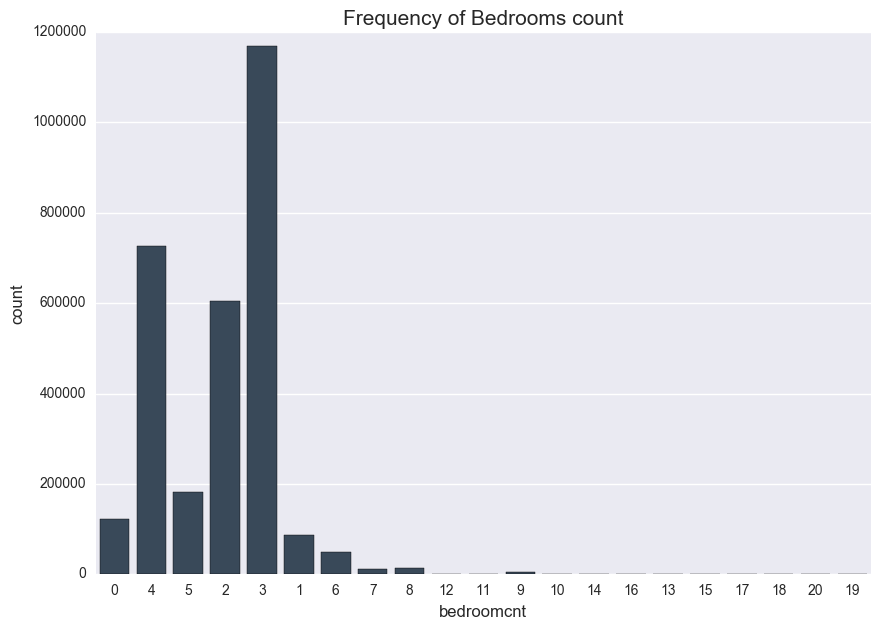

In [82]:
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bedrooms', fontsize=12)
plt.title("Frequency of Bedrooms count", fontsize=15)
sns.countplot(data['bedroomcnt'], color="#34495e");

### Bed to Bath Ratio
After visualizing the distribution of bathroom and bedroom counts, we also thought it would be interesting to try to see if the number of bathrooms were dependent on the number of bedrooms. We chose to stick with a bar chart, only this time using the ratio of bedrooms to bathrooms as the category to find the sum counts of.  What we found is most homes have about a ratio of 1.5 bedrooms per 1 bathroom in a property.

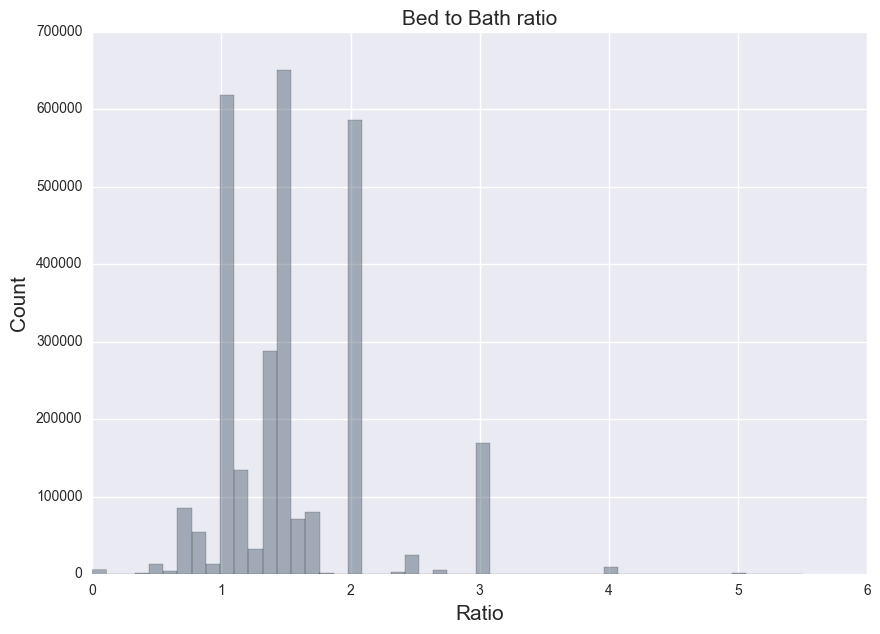

In [83]:
non_zero_mask = data['bathroomcnt'] > 0
bedroom = data[non_zero_mask]['bedroomcnt']
bathroom = data[non_zero_mask]['bathroomcnt']

bedroom_to_bath_ratio = bedroom / bathroom
bedroom_to_bath_ratio = bedroom_to_bath_ratio[bedroom_to_bath_ratio<6]
sns.distplot(bedroom_to_bath_ratio, color="#34495e", kde=False)

plt.title('Bed to Bath ratio', fontsize=15)
plt.xlabel('Ratio', fontsize=15)
plt.ylabel('Count', fontsize=15);

### Average Tax Per Square Feet

For our last attribute, we calculated the tax per square foot to see if we could find any trends.  We again chose to use a bar chart to plot the ratio and the sum counts.  What we found is that plotting this exposes extreme outliers for possible elimination. Most properties are under a few dollars per square foot but as the visualization reveals, there are suspicious records. However, because this is southern California and land space is limited for continuous growth, there could be a reason that some places have high tax per square feet due to better real estate areas.

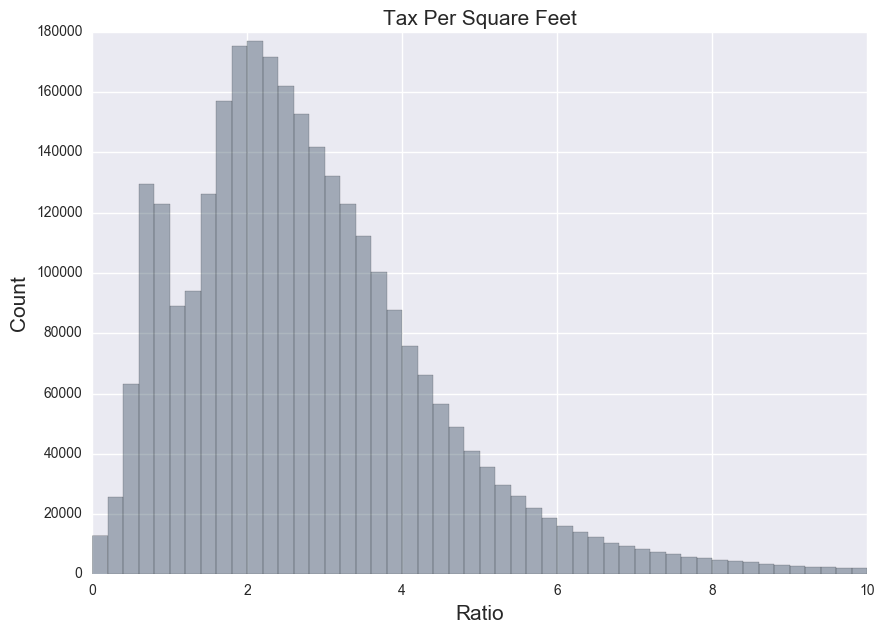

In [84]:
non_zero_mask = data['calculatedfinishedsquarefeet'] > 0
tax = data[non_zero_mask]['taxamount']
sqft = data[non_zero_mask]['calculatedfinishedsquarefeet']

tax_per_sqft = tax / sqft
tax_per_sqft = tax_per_sqft[tax_per_sqft<10]
sns.distplot(tax_per_sqft, color="#34495e", kde=False)

plt.title('Tax Per Square Feet', fontsize=15)
plt.xlabel('Ratio', fontsize=15)
plt.ylabel('Count', fontsize=15);

## Absolute Log Error and Number of Occurrences Per Month

We compared amount of absolute error based monthly average and found out that the error could be cyclical for the year, where the error dips during the Spring and Summer months and rises during the Winter months.

We compared amount of transactions based monthly average and the transactions are the highest during the Spring, Summer, and Fall seasons possibly due to an optimal time to sell property. The transactions are at its lowest during the Winter season.

For a cross comparison, we have high number of transactions during the Spring and Summer seasons while the log error is relatively low and we have low number of transactions during the Winter season while the log error is relatively high.

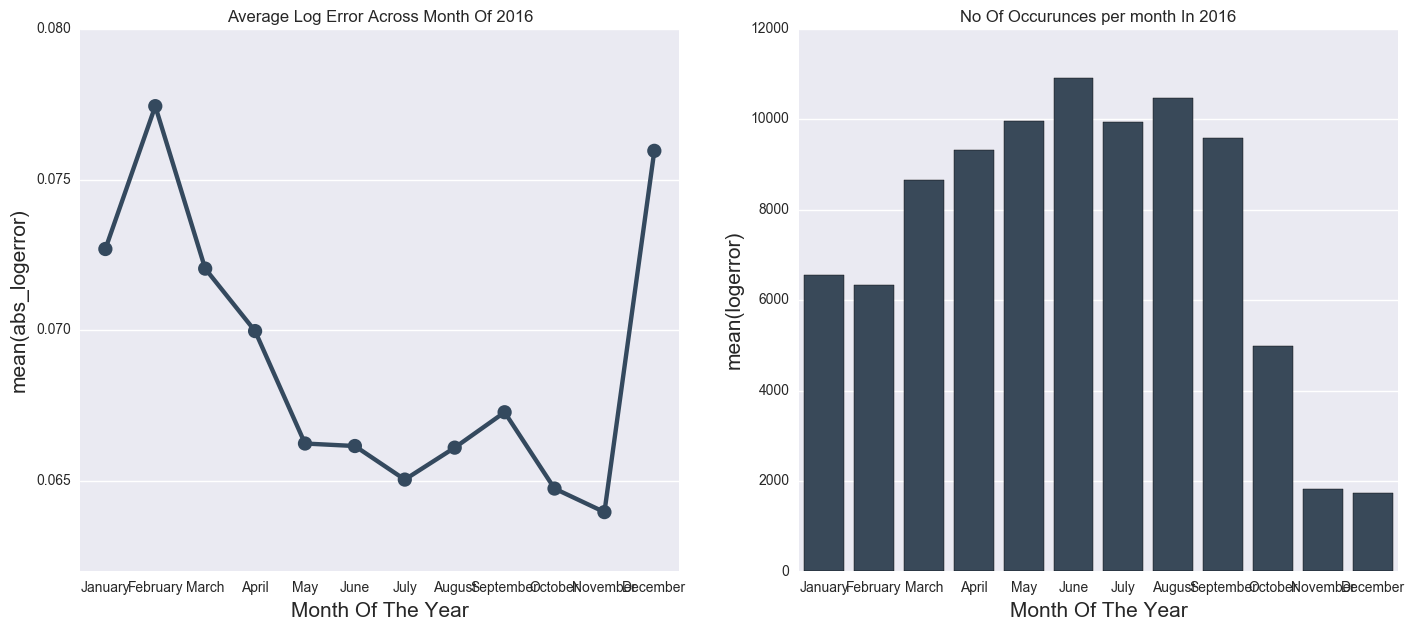

In [85]:
months = train_data['transactiondate'].dt.month
month_names = ['January','February','March','April','May','June','July','August','September','October','November','December']
train_data['abs_logerror'] = train_data['logerror'].abs()

f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=[17, 7])

per_month = train_data.groupby(months)["abs_logerror"].mean()
per_month.index = month_names
ax0.set_title('Average Log Error Across Month Of 2016')
ax0.set_xlabel('Month Of The Year', fontsize=15)
ax0.set_ylabel('Log Error', fontsize=15)
sns.pointplot(x=per_month.index, y=per_month, color="#34495e", ax=ax0)

per_month = train_data.groupby(months)["logerror"].count()
per_month.index = month_names
ax1.set_title('No Of Occurunces per month In 2016')
ax1.set_xlabel('Month Of The Year', fontsize=15)
ax1.set_ylabel('Nimber of Occurences', fontsize=15)
sns.barplot(x=per_month.index, y=per_month, color="#34495e", ax=ax1);

## Number of Transactions and Mean Absolute Log Error Per Day of the Week

Saturdays and Sundays are non-work days, hence why there is a dip in absolute log error and number of transactions

For the workdays, Friday has the most transactions while Monday has the least.

For the workdays, Monday has relatively the most log errors while Friday has relatively the least log errors.

For cross analysis, Monday has the least transactions with the most error while Friday has the most transactions with the least errors. Sunday and Saturday are special cases and does not have substantial evidence to provide any trends.

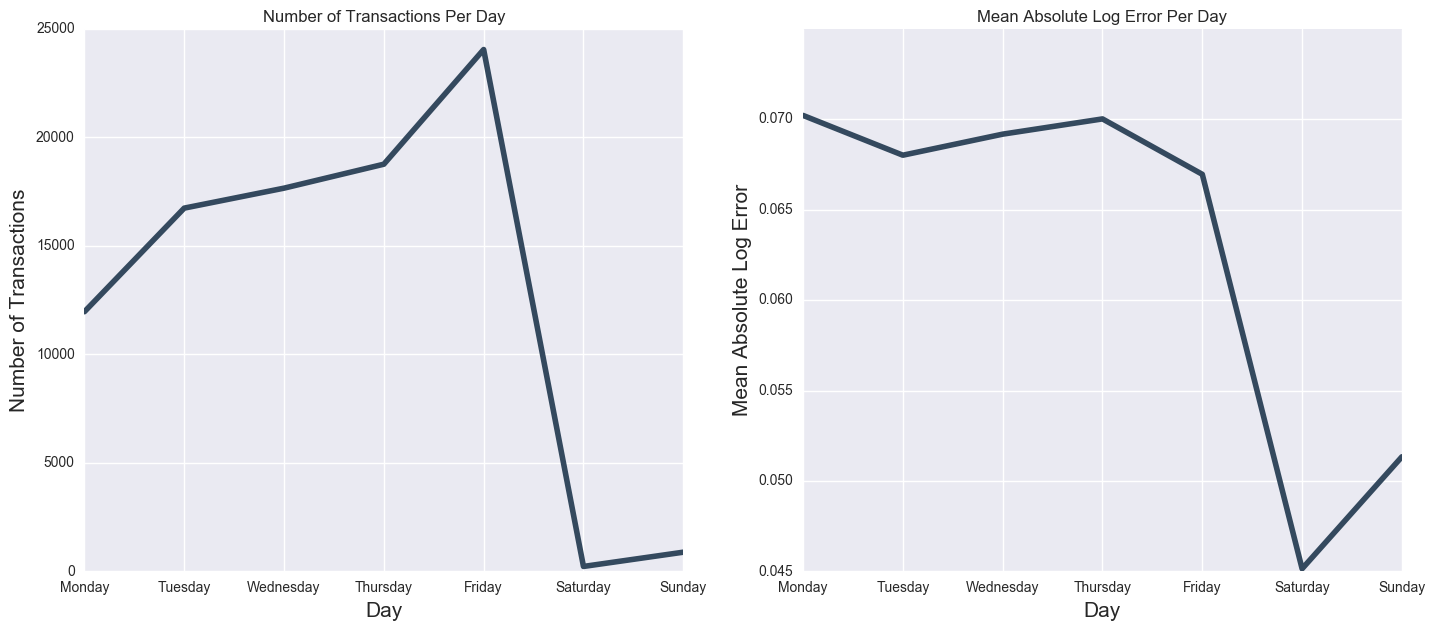

In [86]:
weekday = train_data['transactiondate'].dt.weekday
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
abs_logerror = train_data['logerror'].abs()

f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=[17, 7])

to_plot = abs_logerror.groupby(weekday).count()
to_plot.index = weekdays
to_plot.plot(color="#34495e", linewidth=4, ax=ax0)
ax0.set_title('Number of Transactions Per Day')
ax0.set_ylabel('Number of Transactions', fontsize=15)
ax0.set_xlabel('Day', fontsize=15)

to_plot = abs_logerror.groupby(weekday).mean()
to_plot.index = weekdays
to_plot.plot(color="#34495e", linewidth=4, ax=ax1)
ax1.set_title('Mean Absolute Log Error Per Day')
ax1.set_ylabel('Mean Absolute Log Error', fontsize=15)
ax1.set_xlabel('Day', fontsize=15);

# Continuous Variable Correlation Heatmap

Heatmap of correlations are represented where the warmer colors are highly correlated, white is non-correlated, and colder colors are negatively correlated. We see that calculated finished square feet is correlated with finished square feet, due to collinearity. Tax amounts and year built are also highly correlated to finished square feet as well as with one another. 

Latitude and longitude are negatively correlated with each other possibly because the beachfront properties are more expensive.

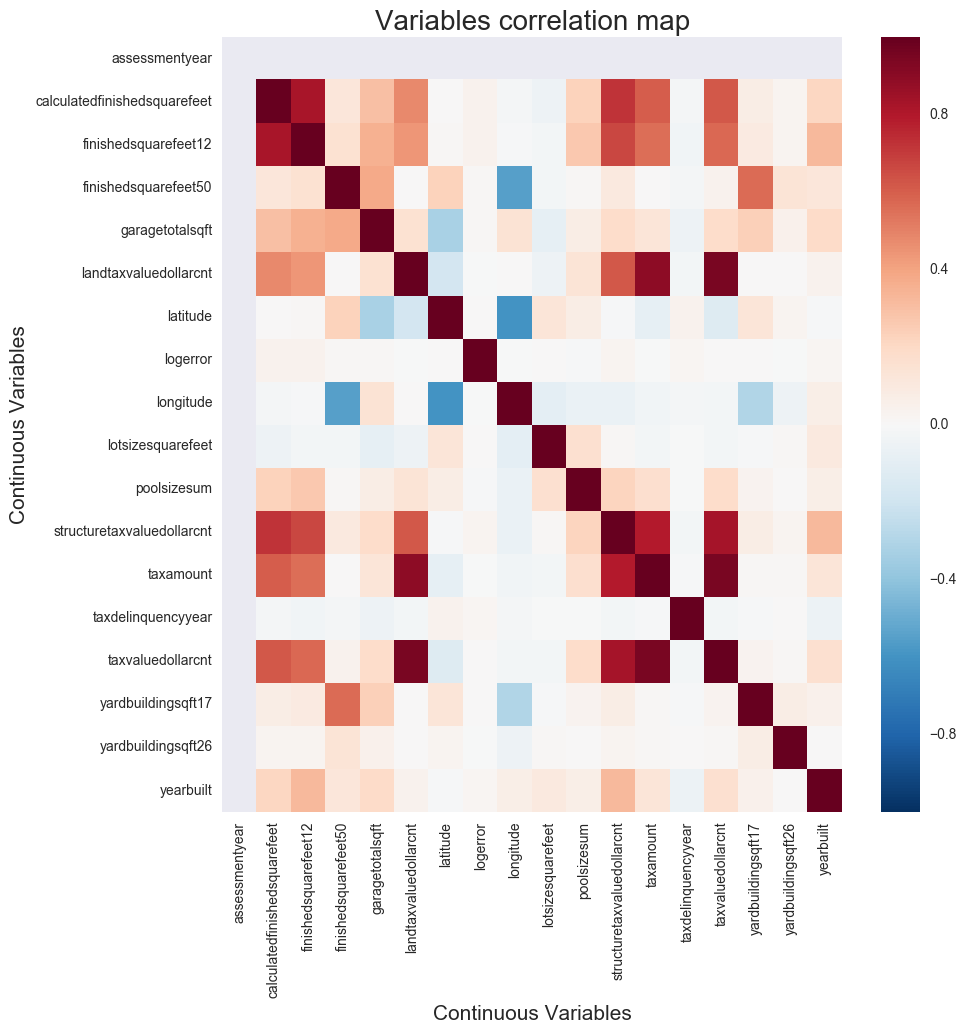

In [87]:
train_data = data[~data['logerror'].isnull()]

continuous_vars = variables[variables['type'].isin(['ratio', 'interval'])].index
continuous_vars = continuous_vars[continuous_vars.isin(data.columns)]
continuous_vars = continuous_vars.sort_values()

corrs = train_data[continuous_vars].corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrs, ax=ax)
plt.title("Variables correlation map", fontsize=20)
plt.xlabel('Continuous Variables', fontsize=15)
plt.ylabel('Continuous Variables', fontsize=15);

# Longitude and Latitude Data Points
From a simple graph, we can see the shoreline of California as well as possible areas of obstruction, such as mountains that prevent property growth in those areas. The majority of properties are in the center to upper left of the graph.

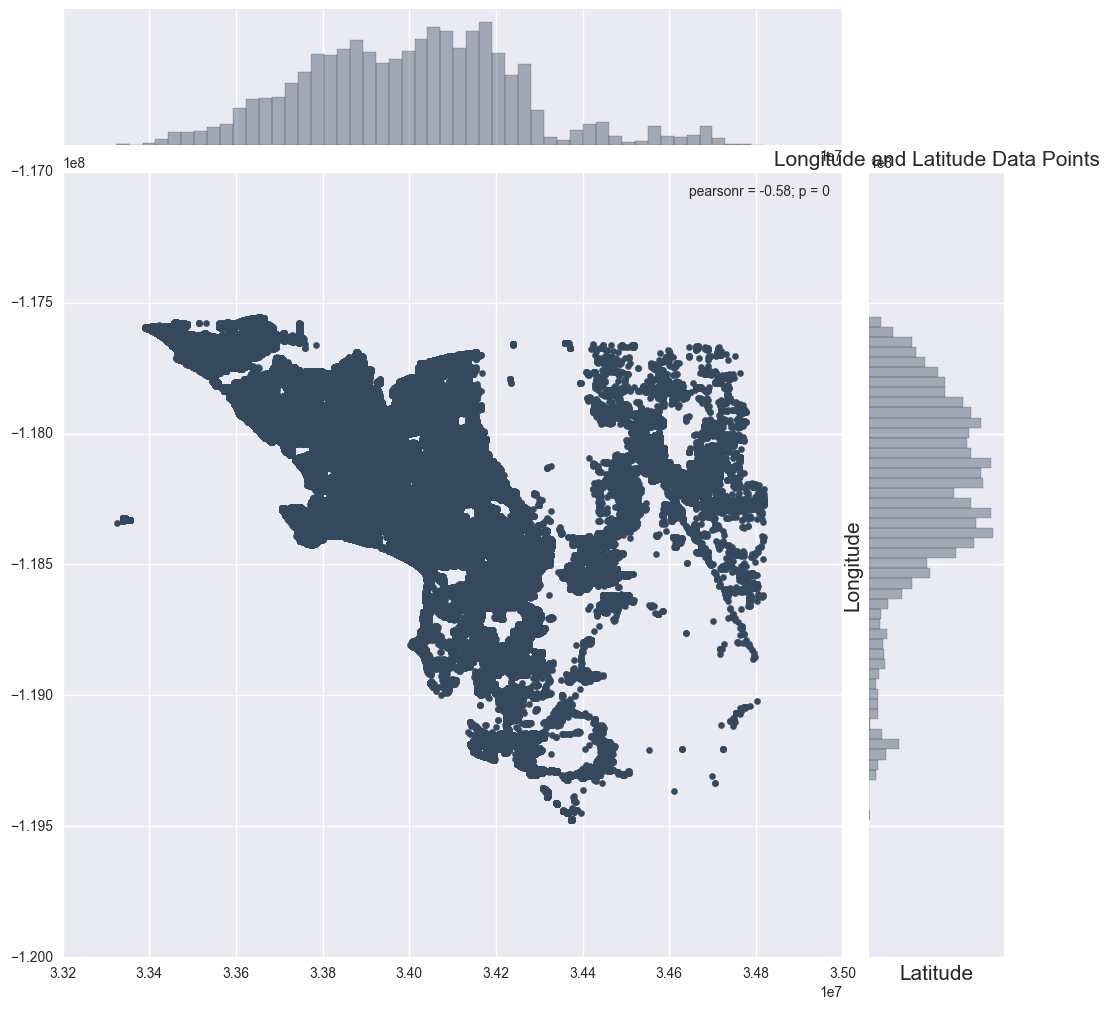

In [88]:
plt.figure(figsize=(12,12));
sns.jointplot(x=data.latitude.values, y=data.longitude.values, size=10, color="#34495e");
plt.ylabel('Longitude', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.title('Longitude and Latitude Data Points', fontsize=15);

# Number of Stories vs Year Built
As architectural feats improved, we started to see more properties with 2 or more stories by 1950. The number of one story properties also increased during that time. The baby boomers, the end of WWII and readily available steel, and mortgage incentives may be the cause of the increase of more properties being built as well as more stories per property. Note: because we filled in missing values as the median value, the 1965 spike in the data is artificial until we use other methods to impute year built.

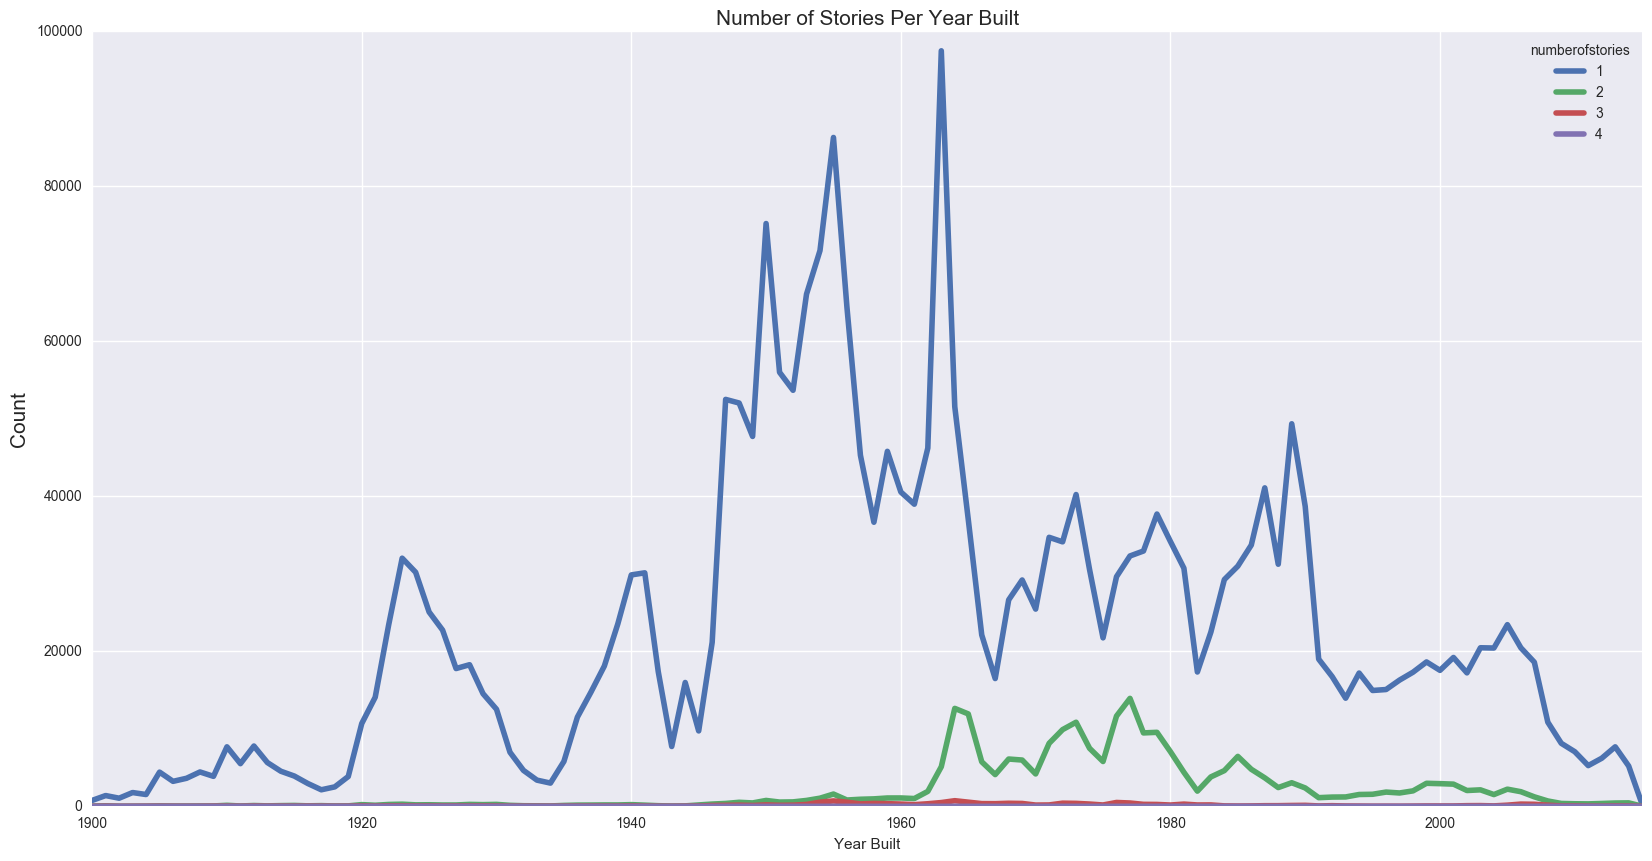

In [89]:
fig,ax1= plt.subplots()
fig.set_size_inches(20,10)
yearMerged = data.groupby(['yearbuilt', 'numberofstories'])["parcelid"].count().unstack('numberofstories').fillna(0)
yearMerged = yearMerged.loc[1900:]
yearMerged.index.name = 'Year Built'

plt.title('Number of Stories Per Year Built', fontsize=15)
plt.ylabel('Count', fontsize=15);

yearMerged.plot(ax=ax1, linewidth=4);

## Scatterplot of Log Error and Calculated Finished Square Feet

We are plotting our best correlated variable calculatedfinishedsquarefeet against the logerror. We don't see any linear relationship from the scatter plot below even though it is evenly distributed.

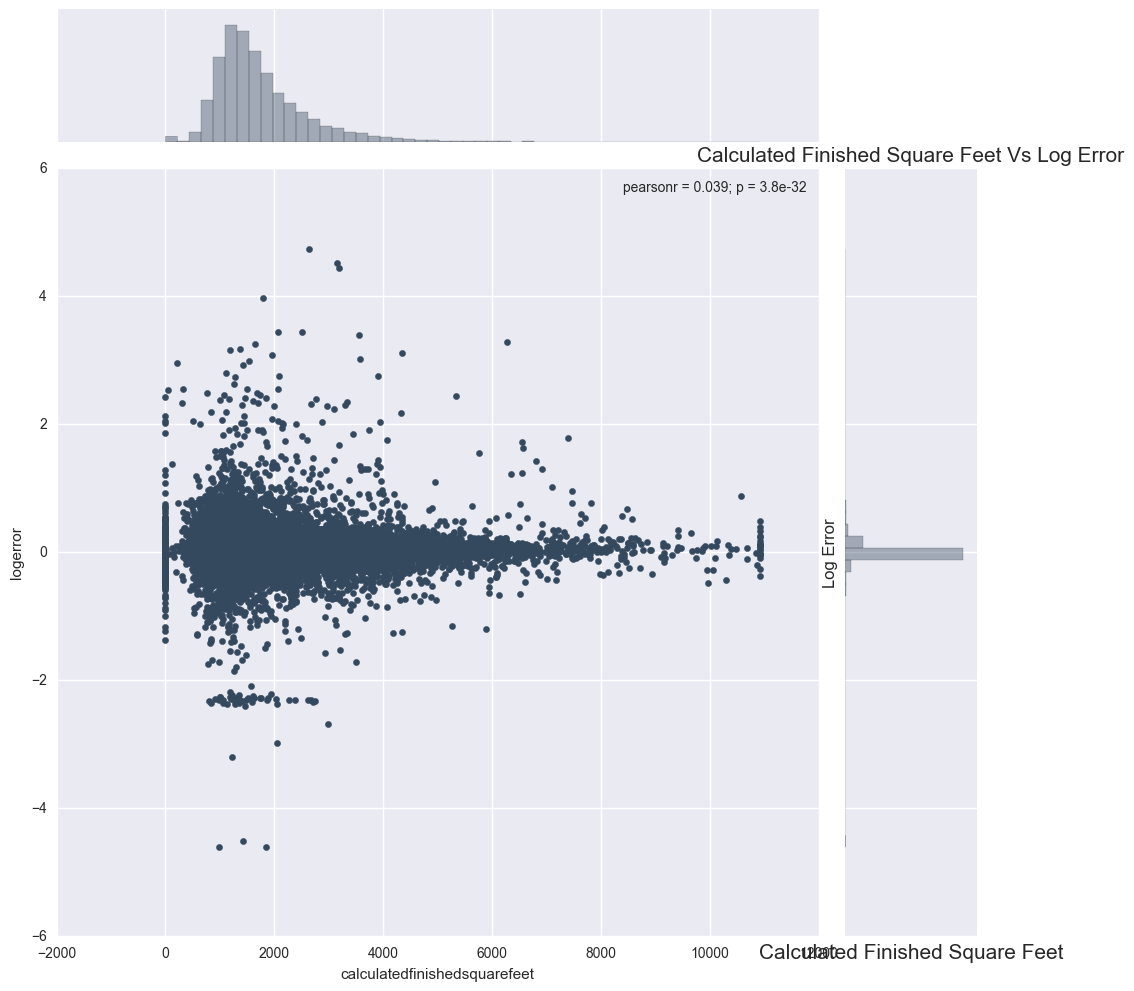

In [91]:
column = "calculatedfinishedsquarefeet"
train_data = data[~data['logerror'].isnull()]

sns.jointplot(train_data[column], train_data['logerror'], size=10, color="#34495e")
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated Finished Square Feet', fontsize=15)
plt.title("Calculated Finished Square Feet Vs Log Error", fontsize=15);

# FYI Modeling and Evaluation, delete later

Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results. Each option is broken down by:

* [10 Points] Train and adjust parameters
* [10 Points] Evaluate and Compare
* [10 Points] Visualize Results
* [20 Points] Summarize the Ramifications

Option A: Cluster Analysis
* Train: Perform cluster analysis using several clustering methods (adjust parameters).
* Eval: Use internal and/or external validation measures to describe and compare the clusterings and the clusters— how did you determine a suitable number of clusters foreach method?
* Visualize: Use tables/visualization to discuss the found results. Explain each visualization in detail.
* Summarize: Describe your results. What findings are the most interesting and why?

Option B: Association Rule Mining
* Train: Create frequent itemsets and association rules (adjust parameters).
* Eval: Use several measure for evaluating how interesting different rules are.
* Visualize: Use tables/visualization to discuss the found results.
* Summarize: Describe your results. What findings are the most compelling and why?

Option C: Collaborative Filtering
* Train: Create user-item matrices or item-item matrices using collaborative filtering (adjust parameters).
* Eval: Determine performance of the recommendations using different performance measures (explain the ramifications of each measure).
* Visualize: Use tables/visualization to discuss the found results. Explain each visualization in detail.
* Summarize: Describe your results. What findings are the most compelling and why?

<a id="Train"></a>
# Train and Adjust Parameters
<b>10 points</b>

<i>
<b>Description:</b><br/>
Perform cluster analysis using several clustering methods (adjust parameters).
</i>

<a href="#top">⏫ Back to Top</a>

## KMeans

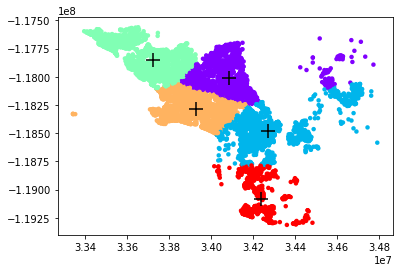

silhouette_avg 0.396628463437
objective function - inertia (within-cluster sum-of-squares) value 3.38235346272e+14


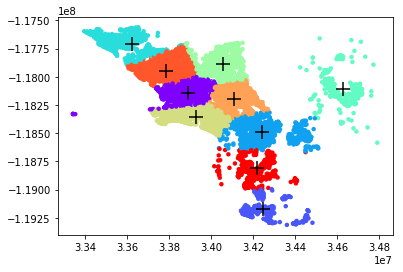

silhouette_avg 0.408600458149
objective function - inertia (within-cluster sum-of-squares) value 1.2828347115e+14


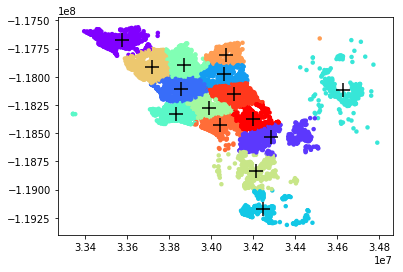

silhouette_avg 0.395580661505
objective function - inertia (within-cluster sum-of-squares) value 8.09861317935e+13


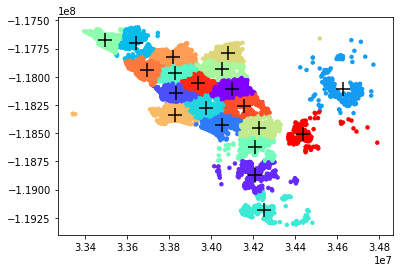

silhouette_avg 0.396221910962
objective function - inertia (within-cluster sum-of-squares) value 5.75087956793e+13


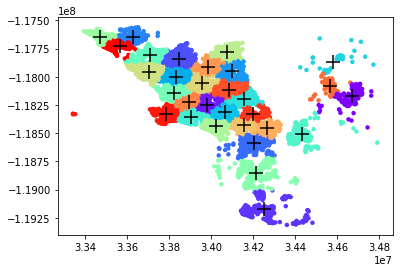

silhouette_avg 0.375485412131
objective function - inertia (within-cluster sum-of-squares) value 4.01086412767e+13


In [9]:
# SSE for each cluster
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans, MiniBatchKMeans

data = dataset[['latitude', 'longitude', 'taxamount']].sample(n=10000)

for n_clusters in [5,10,15,20,30]:
    cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=1)
    cls.fit(data)
    centroids = cls.cluster_centers_
    labels = cls.labels_

    plt.scatter(data['latitude'], data['longitude'], c=labels, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=200, linewidths=3, color='k')
    plt.show()
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    silhouette_avg = silhouette_score(data, labels)
    print('silhouette_avg', silhouette_avg)
    print('objective function - inertia (within-cluster sum-of-squares) value', cls.inertia_) # lower is better

In [20]:
# SSE for each cluster
from sklearn.cluster import DBSCAN

data = dataset[['latitude', 'longitude', 'taxamount']].sample(n=10000)

for eps in np.linspace(5, 100, 10):
    cls = DBSCAN(eps=eps, metric=)
    cls.fit(data)
    labels = cls.labels_
    if len(np.unique(labels)) == 1:
        continue

    plt.scatter(data['latitude'], data['longitude'], c=labels, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.show()
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, labels)
    print('silhouette_avg', silhouette_avg)

silhouette_avg -0.213266938648


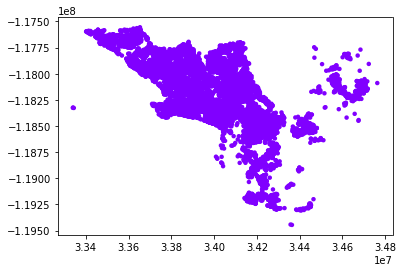

In [26]:


data = dataset[['latitude', 'longitude']].sample(n=10000)

cls = DBSCAN(eps=0.01)
cls.fit(data)
labels = cls.labels_

plt.scatter(data['latitude'], data['longitude'], c=labels, cmap=plt.cm.rainbow, s=20, linewidths=0)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(data, labels)
print('silhouette_avg', silhouette_avg)

In [28]:
from sklearn.neighbors import kneighbors_graph
knn_graph = kneighbors_graph(data, 2, mode='distance')

plt.figure(figsize=(10, 4))
for index, linkage in enumerate(('average', 'complete', 'ward')):
    plt.subplot(1, 3, index + 1)
    model = AgglomerativeClustering(linkage=linkage,
                                    connectivity=connectivity,
                                    n_clusters=n_clusters)
    t0 = time.time()
    model.fit(X)
    elapsed_time = time.time() - t0
    plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                cmap=plt.cm.spectral)
    plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
              fontdict=dict(verticalalignment='top'))
    plt.axis('equal')
    plt.axis('off')

    plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                        left=0, right=1)
    plt.suptitle('n_cluster=%i, connectivity=%r' %
                 (n_clusters, connectivity is not None), size=17)


<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 20000 stored elements in Compressed Sparse Row format>

<a id="Evaluate"></a>
# Evaluate and Compare
<b>10 points</b>

<i>
<b>Description:</b><br/>
Use internal and/or external validation measures to describe and compare the clusterings and the clusters— how did you determine a suitable number of clusters foreach method?
</i>

<a href="#top">⏫ Back to Top</a>

<a id="Visualize"></a>
# Visualize Results
<b>10 points</b>

<i>
<b>Description:</b><br/>
Use tables/visualization to discuss the found results. Explain each visualization in detail.
</i>

<a href="#top">⏫ Back to Top</a>

<a id="Ramifications"></a>
# Summarize the Ramifications
<b>20 points</b>

<i>
<b>Description:</b><br/>
Describe your results. What findings are the most interesting and why?
</i>

<a href="#top">⏫ Back to Top</a>

<a id="Deployment"></a>
# Deployment
<b>10 points</b>

<i>
<b>Description:</b><br/>
Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?
* How useful is your model for interested parties (i.e., the companies or organizations
that might want to use it)?
* How would your deploy your model for interested parties?
* What other data should be collected?
* How often would the model need to be updated, etc.?
</i>

<a href="#top">⏫ Back to Top</a>

<a id="Exceptional"></a>
# Exceptional Work
<b>10 points</b>

<i>
<b>Description:</b><br/>
You have free reign to provide additional analyses or combine analyses.
</i>

<a href="#top">⏫ Back to Top</a>

# References

- Kernels from Kaggle competition: https://www.kaggle.com/c/zillow-prize-1/kernels
- Pandas cookbook: https://pandas.pydata.org/pandas-docs/stable/cookbook.html
- Stackoverflow pandas questions: https://stackoverflow.com/questions/tagged/pandas

<a href="#top">⏫ Back to Top</a>